In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Downloaded a sample dataset from Kaggle

In [2]:
import pandas as pd
aus_veh_df=pd.read_csv('gdrive/My Drive/Australian Vehicle Prices.csv')
#airline_df=pd.read_csv('gdrive/My Drive/Invistico_Airline.csv')

In [3]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
aus_veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [5]:
aus_veh_df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [6]:
aus_veh_df.nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                618
Title                 8804
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14262
ColourExtInt           834
Location               618
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3794
dtype: int64

In [7]:
aus_veh_df.isnull()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
16730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
16731,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16732,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
aus_veh_df.isnull().sum()*100/aus_veh_df.isnull().count()

Brand                 0.005976
Year                  0.005976
Model                 0.005976
Car/Suv               0.167324
Title                 0.005976
UsedOrNew             0.005976
Transmission          0.005976
Engine                0.005976
DriveType             0.005976
FuelType              0.005976
FuelConsumption       0.005976
Kilometres            0.005976
ColourExtInt          0.005976
Location              2.689136
CylindersinEngine     0.005976
BodyType              1.685192
Doors                 9.585275
Seats                10.188837
Price                 0.017928
dtype: float64

In [9]:
for column_name in aus_veh_df.columns:
    print("Unique values in column {} are: {}".format(column_name, aus_veh_df[column_name].unique()))

Unique values in column Brand are: ['Ssangyong' 'MG' 'BMW' 'Mercedes-Benz' 'Renault' 'Toyota' 'Land' 'Nissan'
 'Honda' 'Volkswagen' 'Mitsubishi' 'Ford' 'Subaru' 'Hyundai' 'Jeep'
 'Volvo' 'Mazda' 'Abarth' 'Holden' 'Audi' 'Kia' 'Mini' 'Peugeot' 'Suzuki'
 'Dodge' 'Porsche' 'Daihatsu' 'Isuzu' 'Lexus' 'Jaguar' 'Rolls-Royce'
 'Skoda' 'Fiat' 'Haval' 'Citroen' 'LDV' 'HSV' 'Foton' 'Mahindra'
 'Maserati' 'Alfa' 'GWM' 'Ram' 'Tesla' 'Genesis' 'Chrysler' 'Great' 'Opel'
 'Saab' 'Bentley' 'Rover' nan 'Ferrari' 'Cupra' 'Chevrolet' 'Lamborghini'
 'FPV' 'McLaren' 'Chery' 'Iveco' 'Hummer' 'Infiniti' 'BYD' 'Tata' 'Aston'
 'Daewoo' 'Proton' 'Geely' 'Smart' 'Ineos' 'Caterham' 'Hino'
 'International' 'Lotus' 'Polestar' 'Datsun' 'Packard']
Unique values in column Year are: [2022. 2011. 2004. 2017. 2000. 2013. 2014. 2009. 2018. 2015. 2016. 2012.
 2023. 2005. 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2020. 1999. 2002.
 1995. 1997. 1993. 2001. 1998. 1985. 1992.   nan 1986. 1996. 1994. 1989.
 1990. 1981. 1991. 19

In [148]:
# Found a row with incorrect value in the Price column. Delete rows where Price == 'POA'

aus_veh_df = aus_veh_df.drop(aus_veh_df[aus_veh_df['Price'] == 'POA'].index)

In [149]:
aus_veh_df.loc[aus_veh_df['Year'].isna()]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


In [10]:
# Delete the row

aus_veh_df.drop(2391, axis=0, inplace=True)

In [11]:
# Convert 'Year' column from float to int

aus_veh_df['Year'] = aus_veh_df['Year'].astype(int)

In [12]:
aus_veh_df.dropna(subset='Price', inplace=True)
aus_veh_df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                1703
Price                   0
dtype: int64

In [13]:
columns_to_dropna = ['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'CylindersinEngine', 'BodyType']
aus_veh_df.dropna(subset=columns_to_dropna, inplace=True)

In [14]:
aus_veh_df.isnull().sum()*100/aus_veh_df.isnull().count()

Brand                0.000000
Year                 0.000000
Model                0.000000
Car/Suv              0.000000
Title                0.000000
UsedOrNew            0.000000
Transmission         0.000000
Engine               0.000000
DriveType            0.000000
FuelType             0.000000
FuelConsumption      0.000000
Kilometres           0.000000
ColourExtInt         0.000000
Location             2.652552
CylindersinEngine    0.000000
BodyType             0.000000
Doors                8.036746
Seats                8.651214
Price                0.000000
dtype: float64

In [15]:
aus_veh_df.dropna(subset='Location', inplace=True)
aus_veh_df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                 0
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location                0
CylindersinEngine       0
BodyType                0
Doors                1321
Seats                1415
Price                   0
dtype: int64

In [16]:
aus_veh_df.isnull().sum()*100/aus_veh_df.isnull().count()

Brand                0.000000
Year                 0.000000
Model                0.000000
Car/Suv              0.000000
Title                0.000000
UsedOrNew            0.000000
Transmission         0.000000
Engine               0.000000
DriveType            0.000000
FuelType             0.000000
FuelConsumption      0.000000
Kilometres           0.000000
ColourExtInt         0.000000
Location             0.000000
CylindersinEngine    0.000000
BodyType             0.000000
Doors                8.255734
Seats                8.843197
Price                0.000000
dtype: float64

In [17]:
aus_veh_df.Doors.value_counts()

 4 Doors     10961
 5 Doors      2483
 2 Doors       975
 3 Doors       190
 5 Seats        22
 2 Seats        10
 6 Seats         9
 7 Seats         8
 8 Seats         8
 3 Seats         6
 9 Seats         4
 4 Seats         3
 12 Seats        1
Name: Doors, dtype: int64

In [18]:
aus_veh_df.Seats.value_counts()

 5 Seats     11088
 7 Seats      1767
 4 Seats       642
 2 Seats       538
 8 Seats       267
 3 Seats       241
 6 Seats        22
 14 Seats       11
 9 Seats         3
 11 Seats        3
 12 Seats        3
 22 Seats        1
Name: Seats, dtype: int64

In [19]:
aus_veh_df['Doors'] = aus_veh_df['Doors'].str.extract('(\d+)').astype(float)
aus_veh_df['Seats'] = aus_veh_df['Seats'].str.extract('(\d+)').astype(float)

In [20]:
aus_veh_df.isnull().sum()*100/aus_veh_df.isnull().count()

Brand                0.000000
Year                 0.000000
Model                0.000000
Car/Suv              0.000000
Title                0.000000
UsedOrNew            0.000000
Transmission         0.000000
Engine               0.000000
DriveType            0.000000
FuelType             0.000000
FuelConsumption      0.000000
Kilometres           0.000000
ColourExtInt         0.000000
Location             0.000000
CylindersinEngine    0.000000
BodyType             0.000000
Doors                8.255734
Seats                8.843197
Price                0.000000
dtype: float64

In [21]:
aus_veh_df.Doors.value_counts()

4.0     10964
5.0      2505
2.0       985
3.0       196
6.0         9
7.0         8
8.0         8
9.0         4
12.0        1
Name: Doors, dtype: int64

In [22]:
aus_veh_df.Seats.value_counts()

5.0     11088
7.0      1767
4.0       642
2.0       538
8.0       267
3.0       241
6.0        22
14.0       11
9.0         3
11.0        3
12.0        3
22.0        1
Name: Seats, dtype: int64

In [23]:
aus_veh_df['Doors'].fillna(value=aus_veh_df['Doors'].mean(), inplace=True)
aus_veh_df['Seats'].fillna(value=aus_veh_df['Seats'].mean(), inplace=True)

In [24]:
aus_veh_df.Doors.value_counts()


4.000000     10964
5.000000      2505
4.030041      1321
2.000000       985
3.000000       196
6.000000         9
7.000000         8
8.000000         8
9.000000         4
12.000000        1
Name: Doors, dtype: int64

In [25]:
aus_veh_df.Seats.value_counts()

5.000000     11088
7.000000      1767
5.122446      1415
4.000000       642
2.000000       538
8.000000       267
3.000000       241
6.000000        22
14.000000       11
9.000000         3
11.000000        3
12.000000        3
22.000000        1
Name: Seats, dtype: int64

In [26]:
aus_veh_df.isnull().sum()*100/aus_veh_df.isnull().count()

Brand                0.0
Year                 0.0
Model                0.0
Car/Suv              0.0
Title                0.0
UsedOrNew            0.0
Transmission         0.0
Engine               0.0
DriveType            0.0
FuelType             0.0
FuelConsumption      0.0
Kilometres           0.0
ColourExtInt         0.0
Location             0.0
CylindersinEngine    0.0
BodyType             0.0
Doors                0.0
Seats                0.0
Price                0.0
dtype: float64

In [27]:
aus_veh_df.Kilometres.value_counts()

-         130
10        128
15         96
20         83
7          59
         ... 
57409       1
93518       1
169360      1
95734       1
31852       1
Name: Kilometres, Length: 14035, dtype: int64

In [28]:
aus_veh_df.Price.value_counts()


29990    249
19990    242
24990    201
26990    183
34990    167
        ... 
75500      1
22868      1
16705      1
33850      1
35280      1
Name: Price, Length: 3408, dtype: int64

In [29]:
aus_veh_df.Year.value_counts()

2018    1578
2019    1466
2017    1338
2022    1316
2020    1119
2016    1112
2021    1086
2015    1070
2014     864
2023     860
2013     829
2012     681
2011     503
2010     443
2009     358
2008     309
2007     259
2006     210
2005     169
2004     113
2003      72
2002      62
2000      40
2001      36
1998      29
1999      26
1997       9
1994       9
1996       8
1993       6
1990       4
1989       4
1981       2
1992       2
1985       2
1995       2
1986       1
1991       1
1959       1
1984       1
1978       1
Name: Year, dtype: int64

In [30]:
aus_veh_df['Kilometres'] = pd.to_numeric(aus_veh_df['Kilometres'], errors='coerce')
aus_veh_df["Price"] = pd.to_numeric(aus_veh_df['Price'], errors='coerce')

In [31]:
aus_veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16001 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16001 non-null  object 
 1   Year               16001 non-null  int64  
 2   Model              16001 non-null  object 
 3   Car/Suv            16001 non-null  object 
 4   Title              16001 non-null  object 
 5   UsedOrNew          16001 non-null  object 
 6   Transmission       16001 non-null  object 
 7   Engine             16001 non-null  object 
 8   DriveType          16001 non-null  object 
 9   FuelType           16001 non-null  object 
 10  FuelConsumption    16001 non-null  object 
 11  Kilometres         15871 non-null  float64
 12  ColourExtInt       16001 non-null  object 
 13  Location           16001 non-null  object 
 14  CylindersinEngine  16001 non-null  object 
 15  BodyType           16001 non-null  object 
 16  Doors              160

In [32]:
aus_veh_df['FuelConsumption'] = aus_veh_df['FuelConsumption'].str.extract('([\d.]+) L / 100 km').astype(float)
aus_veh_df['CylindersinEngine'] = aus_veh_df['CylindersinEngine'].str.extract('(\d+)').astype(float)
aus_veh_df['Engine'] = aus_veh_df['Engine'].str.extract('([\d.]+)').astype(float)

In [33]:
aus_veh_df['Transmission'] = aus_veh_df['Transmission'].replace('-', 'Other')
aus_veh_df['FuelType'] = aus_veh_df['FuelType'].replace('-', 'Other')

In [34]:
aus_veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16001 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16001 non-null  object 
 1   Year               16001 non-null  int64  
 2   Model              16001 non-null  object 
 3   Car/Suv            16001 non-null  object 
 4   Title              16001 non-null  object 
 5   UsedOrNew          16001 non-null  object 
 6   Transmission       16001 non-null  object 
 7   Engine             14609 non-null  float64
 8   DriveType          16001 non-null  object 
 9   FuelType           16001 non-null  object 
 10  FuelConsumption    14586 non-null  float64
 11  Kilometres         15871 non-null  float64
 12  ColourExtInt       16001 non-null  object 
 13  Location           16001 non-null  object 
 14  CylindersinEngine  14609 non-null  float64
 15  BodyType           16001 non-null  object 
 16  Doors              160

In [35]:
aus_veh_df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,4.0,AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,4.0,Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,4.0,Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,8.0,Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,4.0,Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990.0


In [36]:
import matplotlib.pyplot as plt

aus_veh_df.describe()

,Year,Engine,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
count,16001.000000,14609.000000,14586.000000,15871.000000,14609.000000,16001.000000,16001.000000,1.595300e+04
mean,2016.104806,4.420700,7.735260,100021.809023,4.420700,4.030041,5.122446,3.539910e+04
std,5.095827,1.101701,2.210268,78357.583536,1.101701,0.662748,1.036982,3.217384e+04
min,1959.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,8.800000e+01
25%,2013.000000,4.000000,6.600000,40651.500000,4.000000,4.000000,5.000000,1.899000e+04
50%,2017.000000,4.000000,7.600000,85644.000000,4.000000,4.000000,5.000000,2.899000e+04
75%,2020.000000,4.000000,8.800000,146680.500000,4.000000,4.000000,5.000000,4.289300e+04
max,2023.000000,12.000000,27.000000,533849.000000,12.000000,12.000000,22.000000,1.500000e+06


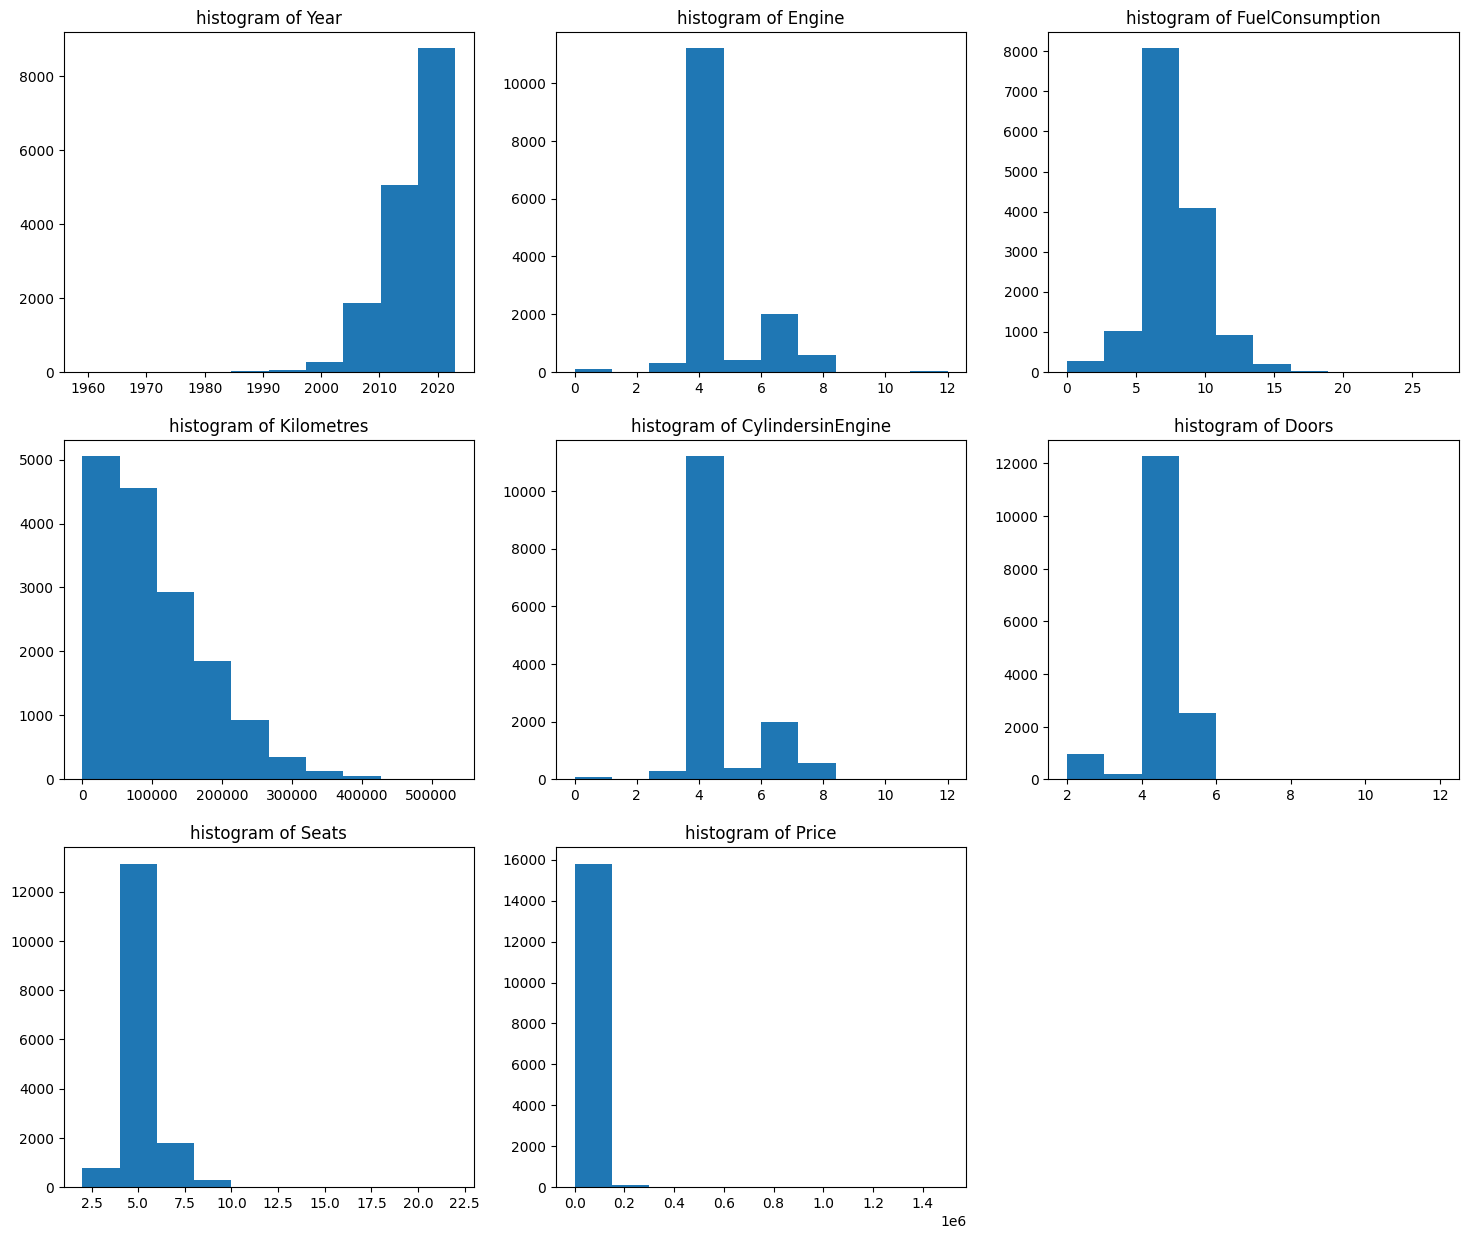

In [37]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(aus_veh_df["Year"])
plt.title("histogram of Year")

plt.subplot(3, 3, 2)
plt.hist(aus_veh_df["Engine"])
plt.title("histogram of Engine")

plt.subplot(3, 3, 3)
plt.hist(aus_veh_df["FuelConsumption"])
plt.title("histogram of FuelConsumption")

plt.subplot(3, 3, 4)
plt.hist(aus_veh_df["Kilometres"])
plt.title("histogram of Kilometres")

plt.subplot(3, 3, 5)
plt.hist(aus_veh_df["CylindersinEngine"])
plt.title("histogram of CylindersinEngine")

plt.subplot(3, 3, 6)
plt.hist(aus_veh_df["Doors"])
plt.title("histogram of Doors")

plt.subplot(3, 3, 7)
plt.hist(aus_veh_df["Seats"])
plt.title("histogram of Seats")

plt.subplot(3, 3, 8)
plt.hist(aus_veh_df["Price"])
plt.title("histogram of Price")

plt.show()

In [38]:
# Descriptive statistics for just text-based variables
aus_veh_df.describe(include=['O'])

,Brand,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,ColourExtInt,Location,BodyType
count,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001,16001
unique,66,725,616,8227,3,3,5,8,781,617,10
top,Toyota,Hilux,SUV,2019 Hyundai I30 Active,USED,Automatic,Front,Unleaded,White / -,"Minchinbury, NSW",SUV
freq,2648,424,5921,60,14729,13979,6819,6832,2796,540,6754


In [39]:
# Drop columns that we don't need

aus_veh_df = aus_veh_df.drop(['Title','Car/Suv','Engine','ColourExtInt'], axis=1)

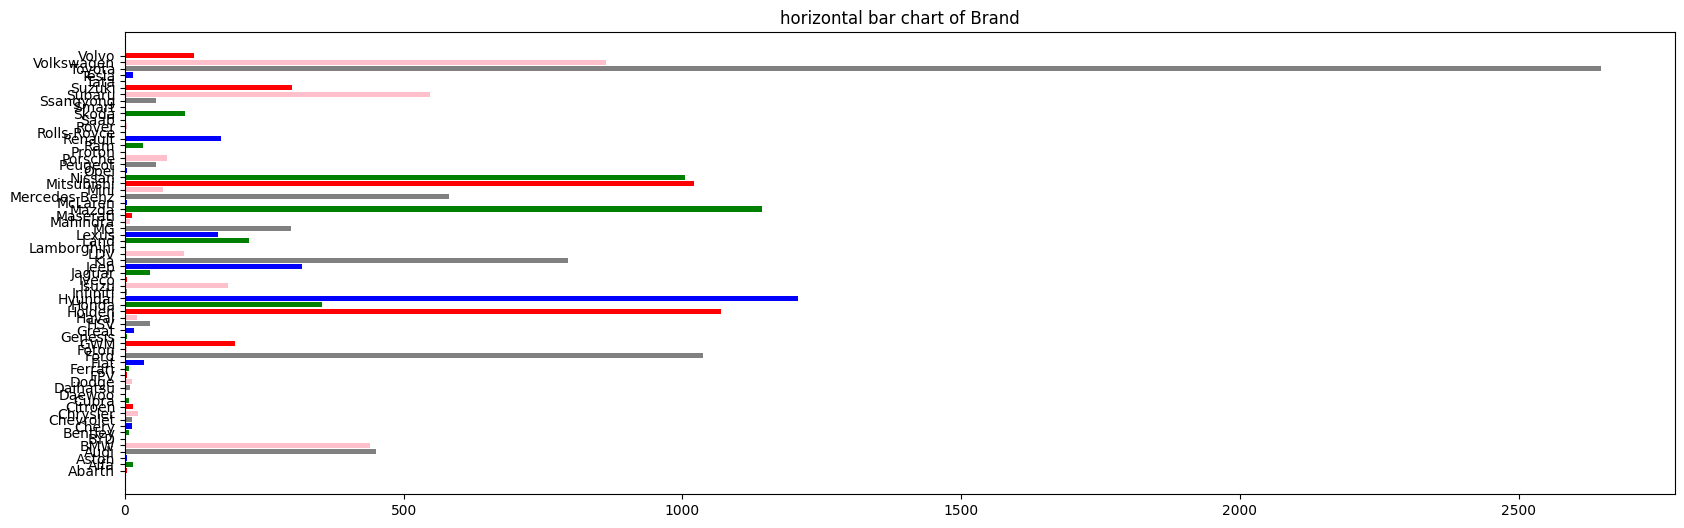

In [40]:
# Bar chart of Brand
plt.figure(figsize=(20,6))
plt.barh(aus_veh_df.groupby("Brand")["Brand"].count().index,
        aus_veh_df.groupby("Brand")["Brand"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Brand")

plt.show()

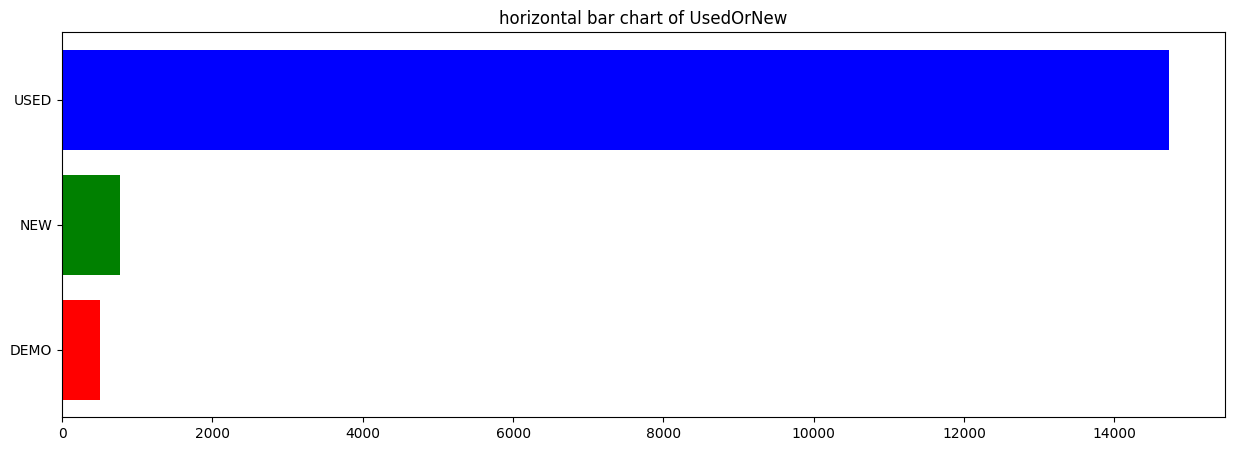

In [41]:
# Bar chart of UsedOrNew
plt.figure(figsize=(15,5))
plt.barh(aus_veh_df.groupby("UsedOrNew")["UsedOrNew"].count().index,
        aus_veh_df.groupby("UsedOrNew")["UsedOrNew"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of UsedOrNew")

plt.show()



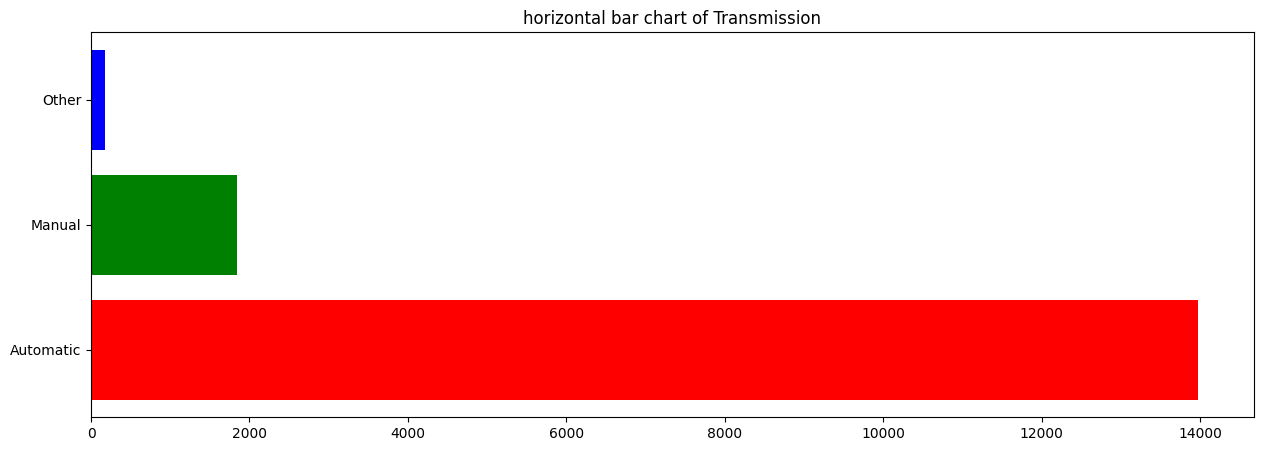

In [42]:
# Bar chart of Transmission
plt.figure(figsize=(15,5))
plt.barh(aus_veh_df.groupby("Transmission")["Transmission"].count().index,
        aus_veh_df.groupby("Transmission")["Transmission"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Transmission")

plt.show()

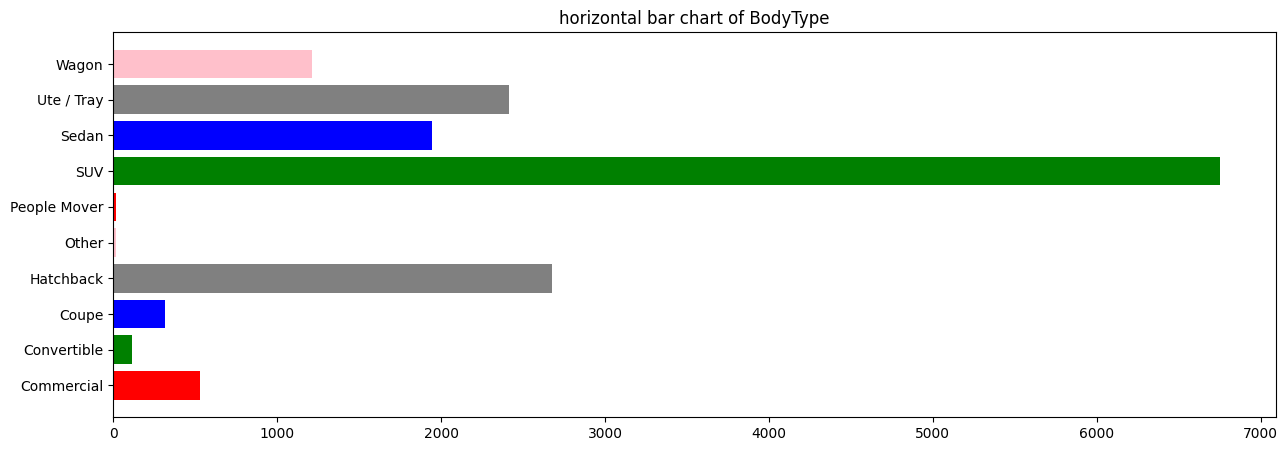

In [43]:
# Bar chart of BodyType
plt.figure(figsize=(15,5))
plt.barh(aus_veh_df.groupby("BodyType")["BodyType"].count().index,
        aus_veh_df.groupby("BodyType")["BodyType"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of BodyType")

plt.show()

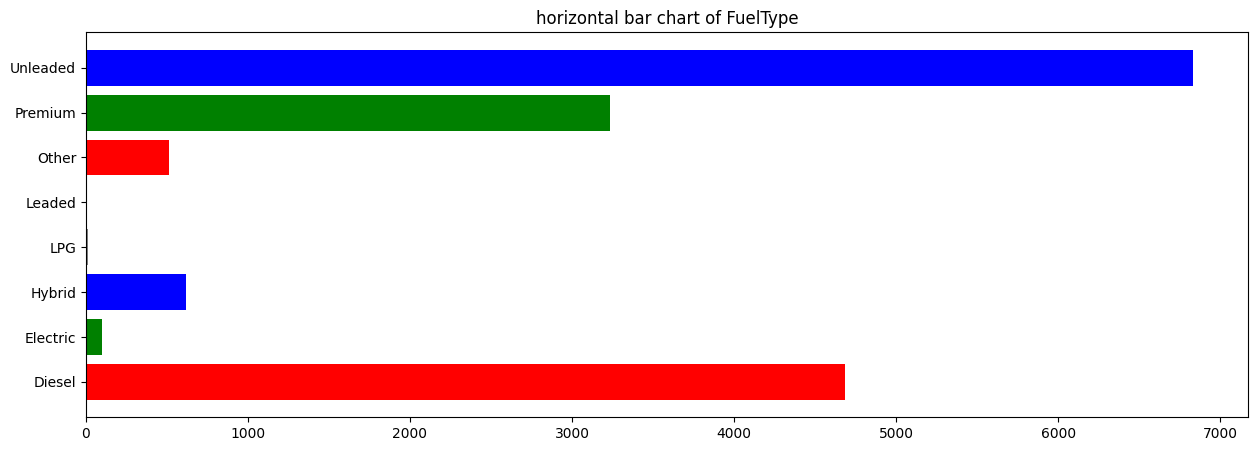

In [44]:
# Bar chart of FuelType
plt.figure(figsize=(15,5))
plt.barh(aus_veh_df.groupby("FuelType")["FuelType"].count().index,
        aus_veh_df.groupby("FuelType")["FuelType"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of FuelType")

plt.show()

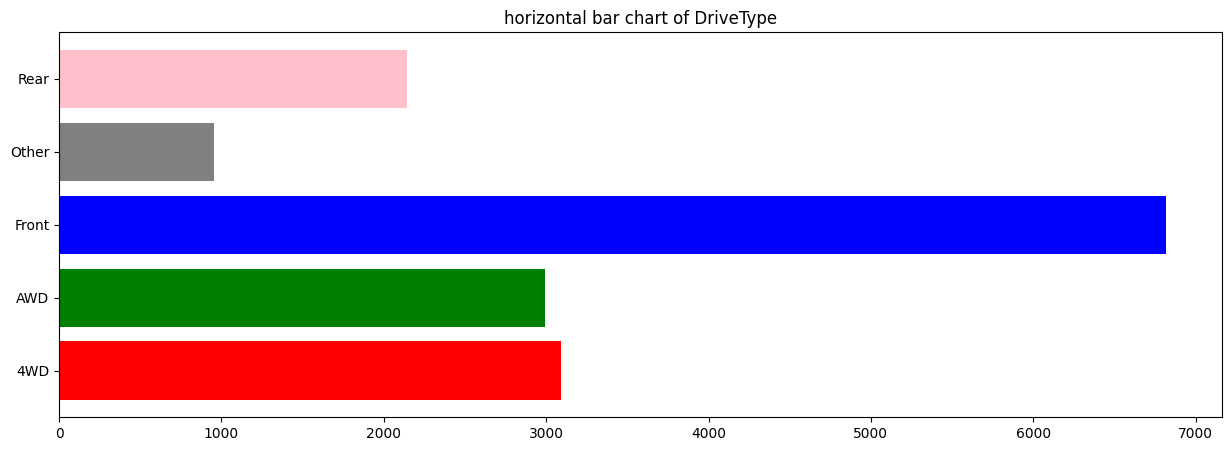

In [45]:
# Bar chart of DriveType
plt.figure(figsize=(15,5))
plt.barh(aus_veh_df.groupby("DriveType")["DriveType"].count().index,
        aus_veh_df.groupby("DriveType")["DriveType"].count(),
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of DriveType")

plt.show()

In [46]:
pip install wordcloud

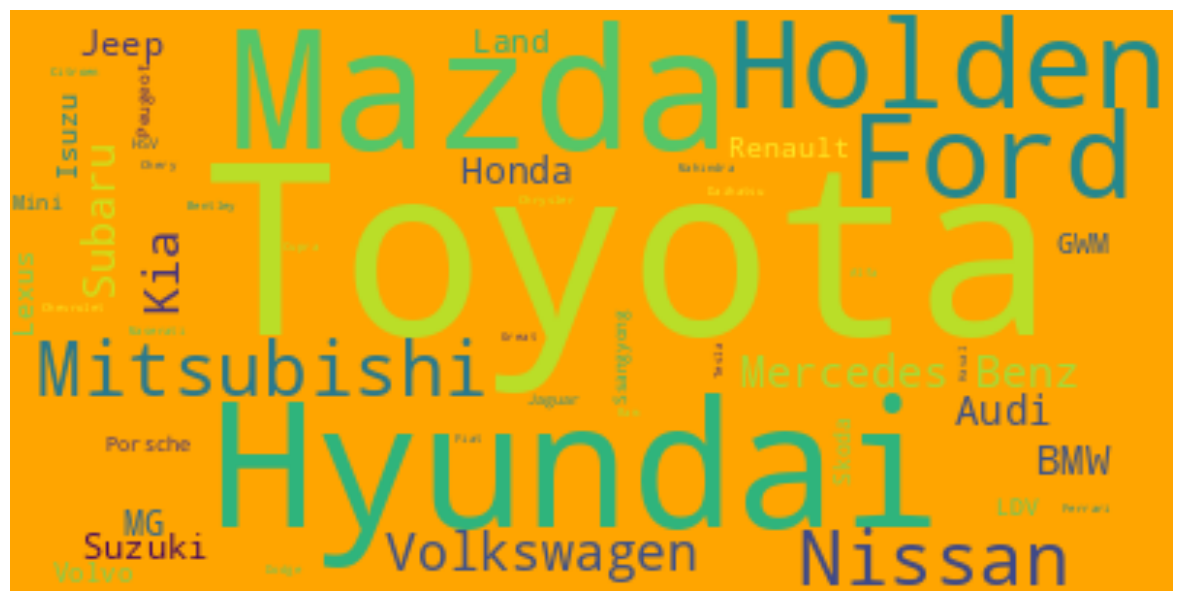

In [47]:
from wordcloud import WordCloud


# Generate a word cloud image
wordcloud = WordCloud(background_color="orange").generate(" ".join(aus_veh_df["Brand"]))
plt.figure(figsize=(15,10))
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()




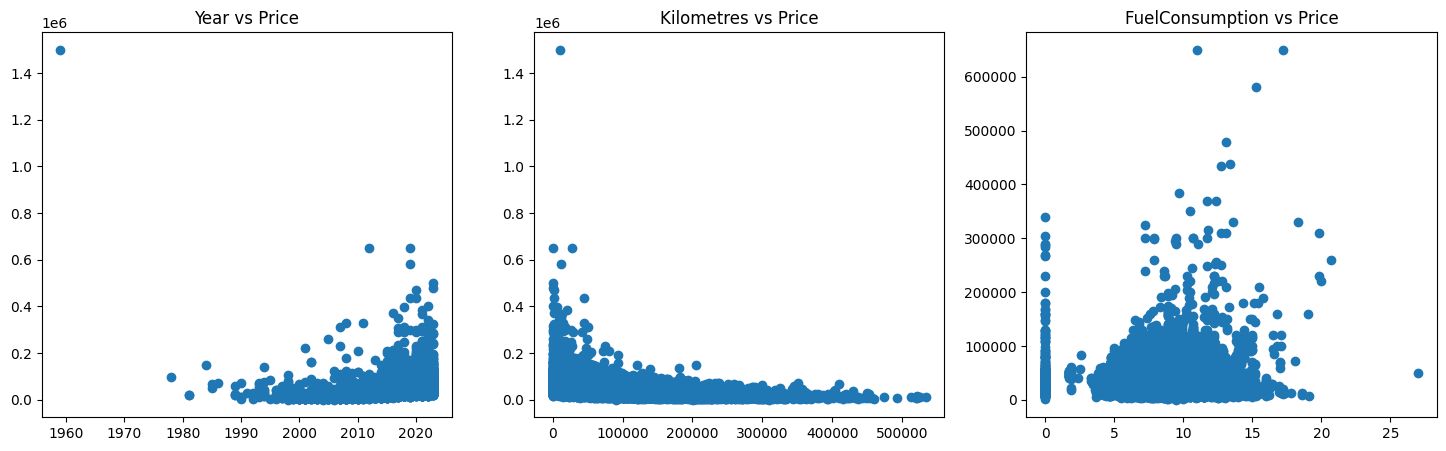

In [48]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(aus_veh_df["Year"], aus_veh_df["Price"])
plt.title("Year vs Price")

plt.subplot(1,3,2)
plt.scatter(aus_veh_df["Kilometres"], aus_veh_df["Price"])
plt.title("Kilometres vs Price")

plt.subplot(1,3,3)
plt.scatter(aus_veh_df["FuelConsumption"], aus_veh_df["Price"])
plt.title("FuelConsumption vs Price")

plt.show()

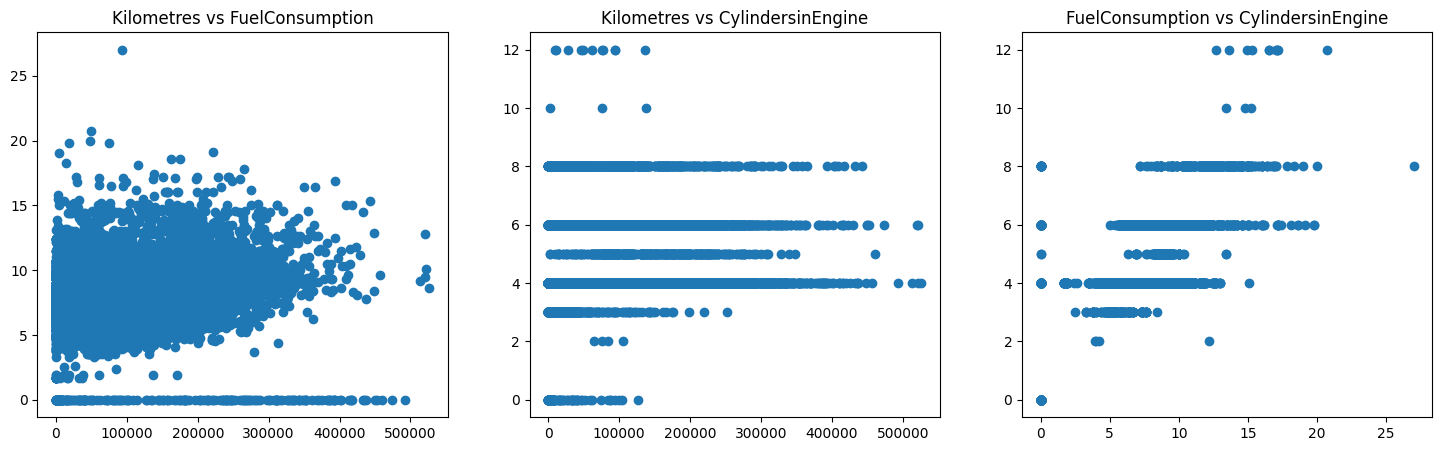

In [49]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(aus_veh_df["Kilometres"], aus_veh_df["FuelConsumption"])
plt.title("Kilometres vs FuelConsumption")

plt.subplot(1,3,2)
plt.scatter(aus_veh_df["Kilometres"], aus_veh_df["CylindersinEngine"])
plt.title("Kilometres vs CylindersinEngine")

plt.subplot(1,3,3)
plt.scatter(aus_veh_df["FuelConsumption"], aus_veh_df["CylindersinEngine"])
plt.title("FuelConsumption vs CylindersinEngine")

plt.show()

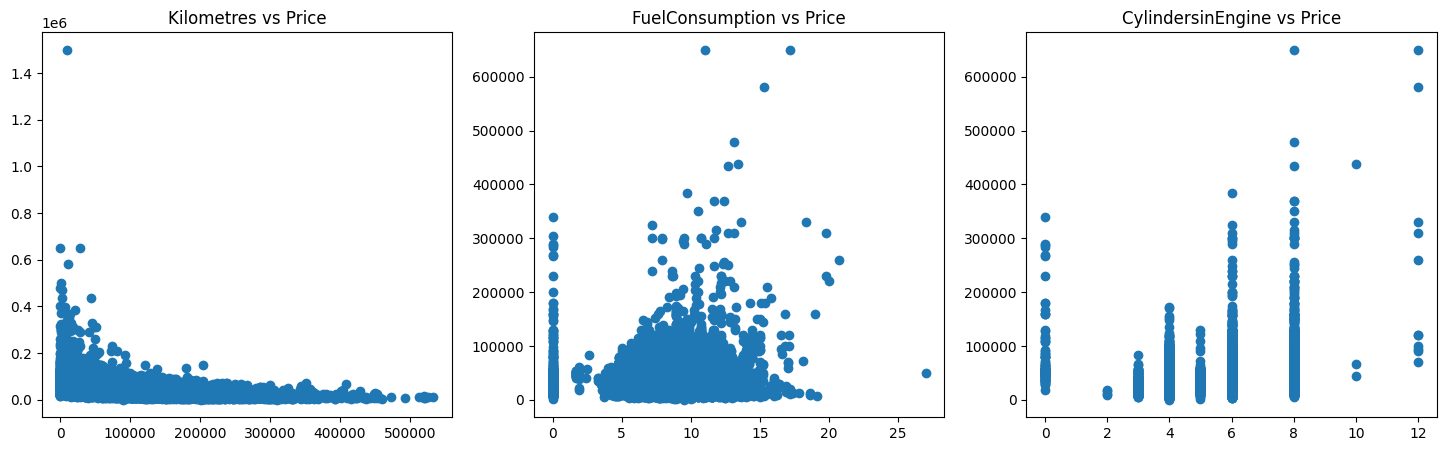

In [50]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(aus_veh_df["Kilometres"], aus_veh_df["Price"])
plt.title("Kilometres vs Price")

plt.subplot(1,3,2)
plt.scatter(aus_veh_df["FuelConsumption"], aus_veh_df["Price"])
plt.title("FuelConsumption vs Price")

plt.subplot(1,3,3)
plt.scatter(aus_veh_df["CylindersinEngine"], aus_veh_df["Price"])
plt.title("CylindersinEngine vs Price")

plt.show()

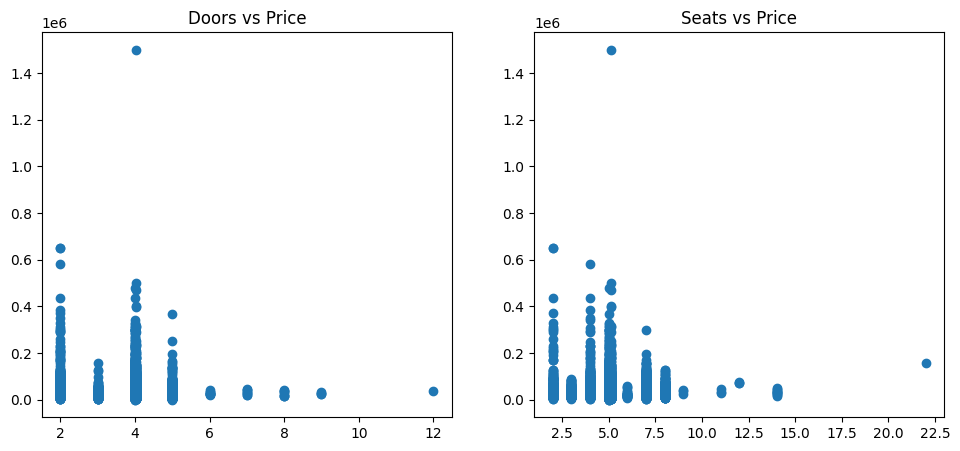

In [51]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(aus_veh_df["Doors"], aus_veh_df["Price"])
plt.title("Doors vs Price")

plt.subplot(1,3,2)
plt.scatter(aus_veh_df["Seats"], aus_veh_df["Price"])
plt.title("Seats vs Price")

plt.show()

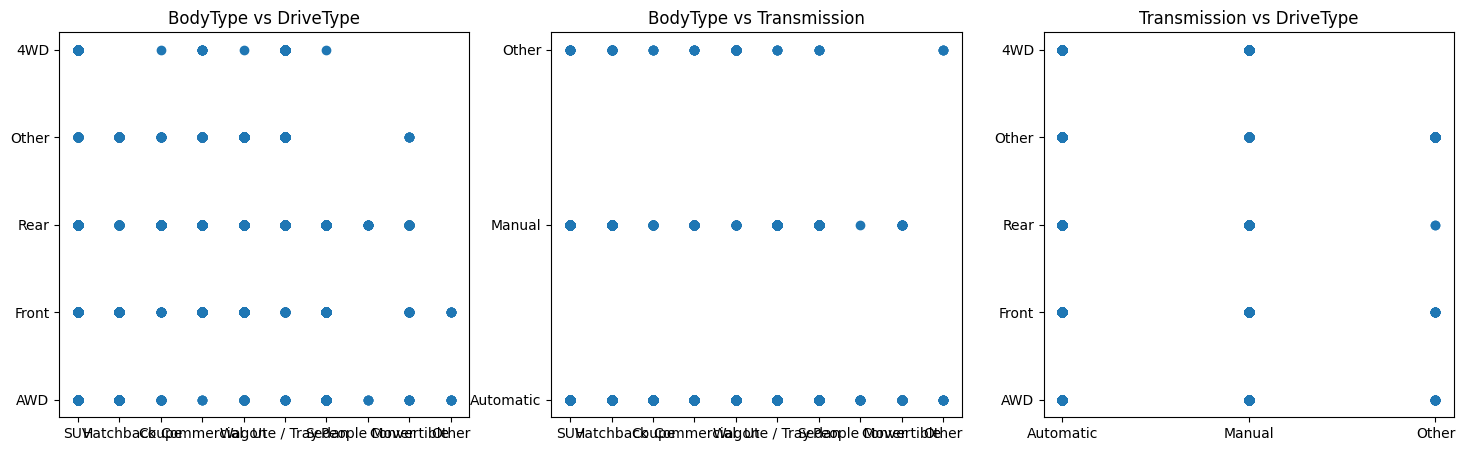

In [52]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(aus_veh_df["BodyType"], aus_veh_df["DriveType"])
plt.title("BodyType vs DriveType")

plt.subplot(1,3,2)
plt.scatter(aus_veh_df["BodyType"], aus_veh_df["Transmission"])
plt.title("BodyType vs Transmission")

plt.subplot(1,3,3)
plt.scatter(aus_veh_df["Transmission"], aus_veh_df["DriveType"])
plt.title("Transmission vs DriveType")

plt.show()

In [53]:
aus_veh_df.corr()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
Year,1.000000,-0.271568,-0.728146,-0.238335,0.100997,0.036927,0.354038
FuelConsumption,-0.271568,1.000000,0.241348,0.594044,-0.253492,0.047138,0.086762
Kilometres,-0.728146,0.241348,1.000000,0.170306,-0.118556,-0.001254,-0.397580
CylindersinEngine,-0.238335,0.594044,0.170306,1.000000,-0.232212,0.026633,0.301690
Doors,0.100997,-0.253492,-0.118556,-0.232212,1.000000,0.339643,-0.108914
Seats,0.036927,0.047138,-0.001254,0.026633,0.339643,1.000000,0.017676
Price,0.354038,0.086762,-0.397580,0.301690,-0.108914,0.017676,1.000000


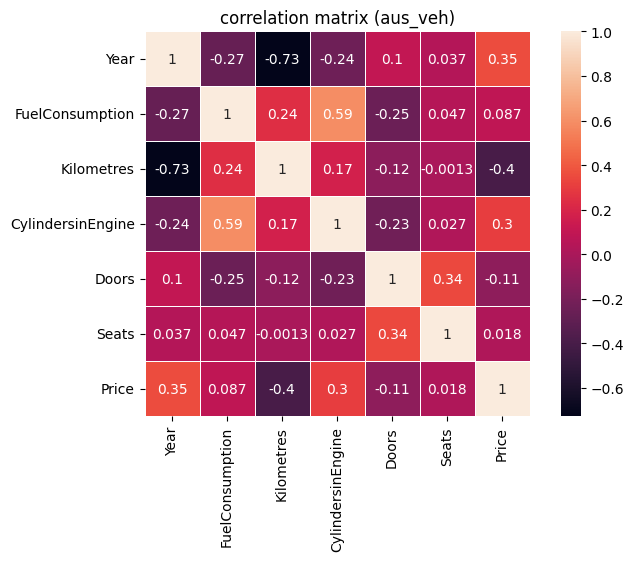

In [54]:
import seaborn as sns

# Make the correlation matrices
corrmat_aus_veh = aus_veh_df.corr()

# Heat maps are a great way to get
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_aus_veh, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (aus_veh)")

plt.show()

# Try to match the correlation numbers
# to the scatter plots above to get a
# sense of what each magnitude of
# correlation can look like.


In [55]:
# Derive averages by group
aus_veh_df.groupby("FuelType").mean()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
FuelType,,,,,,,
Diesel,2016.086641,7.781052,127592.432033,4.471061,3.869083,5.212901,39296.774090
Electric,2021.090000,0.000000,19933.646465,0.000000,4.143004,4.922245,82287.620000
Hybrid,2020.173984,4.915935,41356.289902,4.165854,4.499187,5.100813,54595.804241
LPG,2010.866667,13.978571,191671.933333,6.000000,3.202003,3.808163,15420.133333
Leaded,1983.000000,11.000000,175628.750000,7.500000,3.500000,4.750000,91342.500000
Other,2016.610465,7.250898,73416.219067,4.121053,4.136672,5.129329,36809.089844
Premium,2016.655738,8.068293,73205.053549,4.664715,3.966742,4.935152,45693.247212
Unleaded,2015.409982,7.924669,101932.409601,4.358066,4.120584,5.156496,25336.845104


In [56]:
# Derive averages by group
aus_veh_df.groupby("BodyType").mean()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
BodyType,,,,,,,
Commercial,2014.804143,7.952648,140041.892045,4.149533,3.919392,3.684960,31833.712665
Convertible,2011.201754,8.292079,86323.017544,5.217822,2.231496,3.470104,64407.798246
Coupe,2013.493631,8.744961,78058.356688,5.559387,2.342459,4.040946,77497.076677
Hatchback,2015.850205,6.411306,85075.949567,3.948248,4.693836,4.959953,22962.805993
Other,2019.928571,6.514286,27034.857143,4.285714,4.000000,5.000000,68863.142857
People Mover,2011.842105,8.406667,156447.368421,4.421053,3.210526,12.236304,42503.105263
SUV,2017.327954,7.701304,87338.357773,4.407946,4.043459,5.531431,38391.131294
Sedan,2014.077042,8.067233,109512.523124,4.712082,4.004109,4.982212,31800.553672
Ute / Tray,2016.220108,8.671500,132485.207012,4.537381,3.610264,4.493055,38659.006647


In [57]:
# Derive averages by group
aus_veh_df.groupby("Transmission").mean()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
Transmission,,,,,,,
Automatic,2016.540740,7.701299,93777.640389,4.415210,4.072349,5.202992,36221.240620
Manual,2012.671900,8.011654,151342.381858,4.475352,3.712521,4.518204,27516.665764
Other,2017.514286,6.703125,52108.012121,3.718750,4.001691,5.065770,53799.208333


In [58]:
# Derive averages by group
aus_veh_df.groupby("DriveType").mean()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
DriveType,,,,,,,
4WD,2015.671197,8.742150,131368.709499,4.694175,3.855340,5.334344,40885.033744
AWD,2017.250000,7.631655,83728.988889,4.481132,4.070712,5.375307,47611.921608
Front,2016.779147,6.887116,82647.480949,4.019973,4.261915,5.145889,26131.126783
Other,2014.836649,5.800000,101538.504792,4.000000,4.031506,5.120096,40103.105932
Rear,2013.552914,9.124597,131657.352310,5.228988,3.487191,4.391009,37830.042930


In [59]:
# Derive averages by group
aus_veh_df.groupby("UsedOrNew").mean()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
UsedOrNew,,,,,,,
DEMO,2022.363636,7.005275,1566.597222,4.002294,4.065421,5.234330,63135.846307
NEW,2022.537859,7.411058,318.317901,4.001580,4.143480,5.209250,50534.905479
USED,2015.555231,7.773988,107782.478157,4.453767,4.022926,5.114088,33704.684486


In [60]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(aus_veh_df["UsedOrNew"], aus_veh_df["DriveType"])
count_table

DriveType,4WD,AWD,Front,Other,Rear
UsedOrNew,,,,,
DEMO,65,152,222,55,12
NEW,139,115,394,106,12
USED,2886,2725,6203,794,2121


In [61]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(aus_veh_df["UsedOrNew"], aus_veh_df["FuelType"])
count_table

FuelType,Diesel,Electric,Hybrid,LPG,Leaded,Other,Premium,Unleaded
UsedOrNew,,,,,,,,
DEMO,69,18,42,0,0,39,208,130
NEW,194,10,25,0,0,134,158,245
USED,4423,72,548,15,4,343,2867,6457


In [62]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(aus_veh_df["UsedOrNew"], aus_veh_df["Transmission"])
count_table

Transmission,Automatic,Manual,Other
UsedOrNew,,,
DEMO,469,8,29
NEW,727,14,25
USED,12783,1825,121


In [63]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(aus_veh_df["UsedOrNew"], aus_veh_df["BodyType"])
count_table

BodyType,Commercial,Convertible,Coupe,Hatchback,Other,People Mover,SUV,Sedan,Ute / Tray,Wagon
UsedOrNew,,,,,,,,,,
DEMO,5,1,4,42,4,0,333,33,37,47
NEW,13,0,0,80,0,0,468,7,145,53
USED,513,113,310,2555,10,19,5953,1907,2235,1114


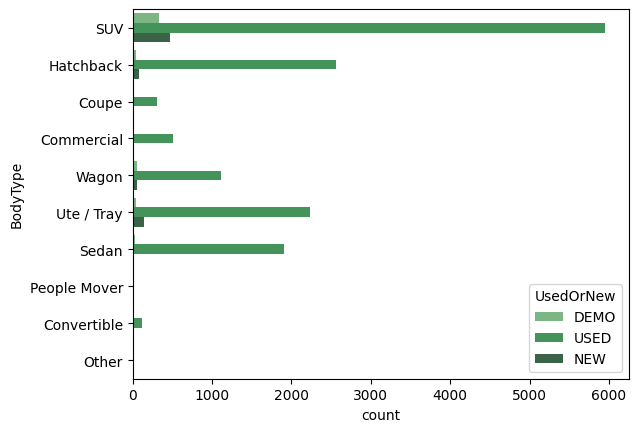

In [64]:
# Plot counts for each combination of levels.
sns.countplot(y="BodyType", hue="UsedOrNew", data=aus_veh_df, palette="Greens_d")
plt.show()

In [107]:
#! pip install mlxtend==0.21.0

#! pip install matplotlib==3.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
plotnine 0.12.4 requires matplotlib>=3.6.0, but you have matplotlib 3.5.3 which is incompatible.


In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [67]:
aus_veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16001 entries, 0 to 16733
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16001 non-null  object 
 1   Year               16001 non-null  int64  
 2   Model              16001 non-null  object 
 3   UsedOrNew          16001 non-null  object 
 4   Transmission       16001 non-null  object 
 5   DriveType          16001 non-null  object 
 6   FuelType           16001 non-null  object 
 7   FuelConsumption    14586 non-null  float64
 8   Kilometres         15871 non-null  float64
 9   Location           16001 non-null  object 
 10  CylindersinEngine  14609 non-null  float64
 11  BodyType           16001 non-null  object 
 12  Doors              16001 non-null  float64
 13  Seats              16001 non-null  float64
 14  Price              15953 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 2.0+ MB


In [65]:
aus_veh_df.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price
count,16001.000000,14586.000000,15871.000000,14609.000000,16001.000000,16001.000000,1.595300e+04
mean,2016.104806,7.735260,100021.809023,4.420700,4.030041,5.122446,3.539910e+04
std,5.095827,2.210268,78357.583536,1.101701,0.662748,1.036982,3.217384e+04
min,1959.000000,0.000000,1.000000,0.000000,2.000000,2.000000,8.800000e+01
25%,2013.000000,6.600000,40651.500000,4.000000,4.000000,5.000000,1.899000e+04
50%,2017.000000,7.600000,85644.000000,4.000000,4.000000,5.000000,2.899000e+04
75%,2020.000000,8.800000,146680.500000,4.000000,4.000000,5.000000,4.289300e+04
max,2023.000000,27.000000,533849.000000,12.000000,12.000000,22.000000,1.500000e+06


<Axes: >

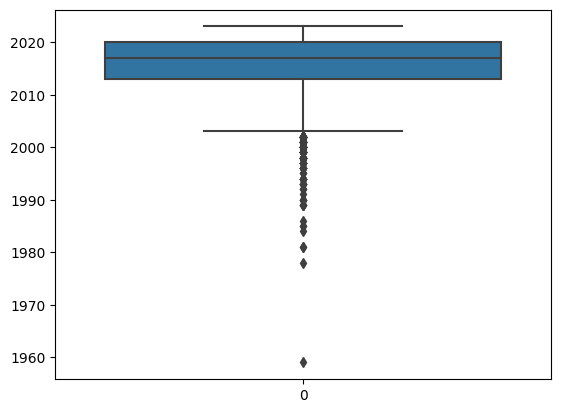

In [68]:
sns.boxplot(aus_veh_df["Year"])

In [69]:
aus_veh_df.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,DEMO,Automatic,AWD,Diesel,8.7,5595.0,"Caringbah, NSW",4.0,SUV,4.0,7.0,51990.0
1,MG,2022,MG3,USED,Automatic,Front,Premium,6.7,16.0,"Brookvale, NSW",4.0,Hatchback,5.0,5.0,19990.0
2,BMW,2022,430I,USED,Automatic,Rear,Premium,6.6,8472.0,"Sylvania, NSW",4.0,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11.0,136517.0,"Mount Druitt, NSW",8.0,Coupe,2.0,4.0,32990.0
4,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6.0,1035.0,"Castle Hill, NSW",4.0,SUV,4.0,5.0,34990.0


In [70]:
# Split 'Location' column by ',' and obtain 'State' column

aus_veh_df[['City','State']] = aus_veh_df['Location'].str.split(',', expand=True)

In [71]:
# Drop 'Location' and 'City' columns
aus_veh_df = aus_veh_df.drop(['Location'],axis=1)

In [72]:
# Introducing a new column 'Age' to know the age of the car

from datetime import date
date.today().year
aus_veh_df['Car_Age']=date.today().year-aus_veh_df['Year']
aus_veh_df.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,City,State,Car_Age
0,Ssangyong,2022,Rexton,DEMO,Automatic,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0,Caringbah,NSW,2
1,MG,2022,MG3,USED,Automatic,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0,Brookvale,NSW,2
2,BMW,2022,430I,USED,Automatic,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0,Sylvania,NSW,2
3,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0,Mount Druitt,NSW,13
4,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0,Castle Hill,NSW,2


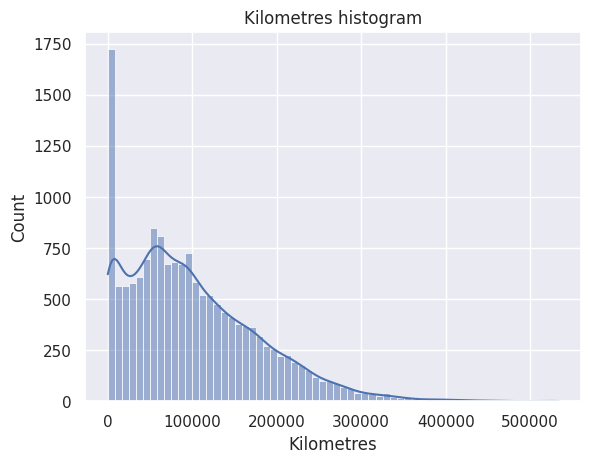

In [73]:
sns.set(style="darkgrid")

sns.histplot(data=aus_veh_df, x='Kilometres', kde=True)
plt.title('Kilometres histogram')
plt.show()

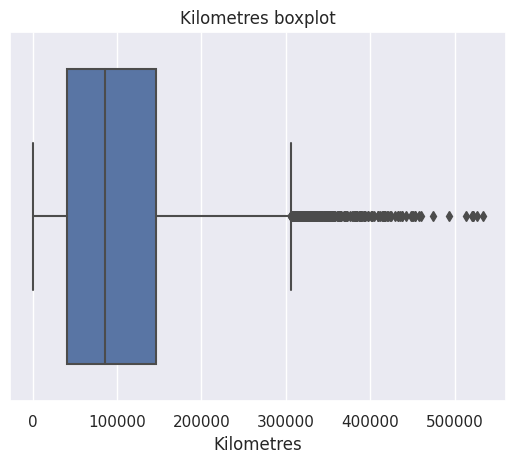

In [74]:
sns.boxplot(x=aus_veh_df['Kilometres'])
plt.title("Kilometres boxplot")
plt.show()

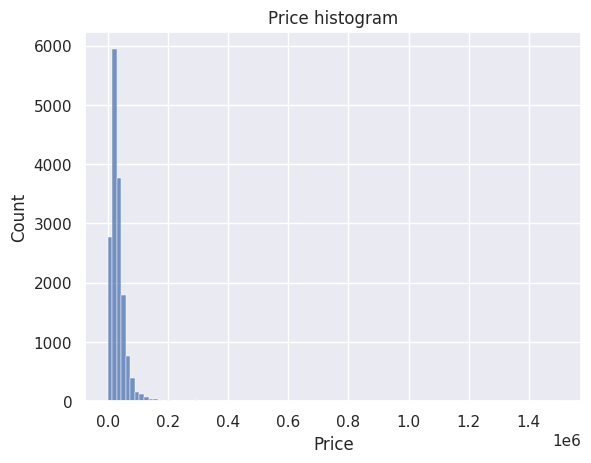

In [75]:
sns.set(style="darkgrid")

sns.histplot(data=aus_veh_df, x='Price', bins=100)
plt.title('Price histogram')
plt.show()

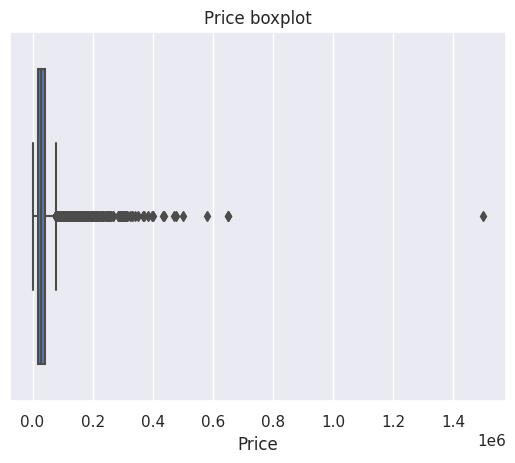

In [76]:
sns.boxplot(x=aus_veh_df['Price'])
plt.title("Price boxplot")
plt.show()

In [77]:
# NumPy's `percentile()` method returns the
# values of the given percentiles. In this case,
# give `75` and `25` as parameters, which corresponds
# to the third and the first quartiles.
Q1 = aus_veh_df['Kilometres'].quantile(0.25)
Q3 = aus_veh_df['Kilometres'].quantile(0.75)
IQR = Q3 - Q1

print("25th quartile: ", Q1)
print("75th quartile: ", Q3)
print(IQR)


25th quartile:  40651.5
75th quartile:  146680.5
106029.0


In [78]:
upper = Q3+1.5*IQR
print("Upper Bound:", upper)

lower = Q1-1.5*IQR
print("Lower Bound:", lower)

Upper Bound: 305724.0
Lower Bound: -118392.0


In [79]:
aus_veh_df[aus_veh_df['Kilometres'] >= upper]

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,City,State,Car_Age
237,Toyota,2013,Hilux,USED,Manual,Rear,Diesel,8.1,345194.0,4.0,Ute / Tray,4.000000,5.000000,12990.0,Blacktown,NSW,11
380,Isuzu,2016,D-MAX,USED,Automatic,4WD,Diesel,8.1,310215.0,4.0,Ute / Tray,2.000000,4.000000,21990.0,Bankstown,NSW,8
411,Toyota,2007,Land,USED,Automatic,Other,Unleaded,NaN,310000.0,NaN,Wagon,4.030041,5.122446,16990.0,Seven Hills,NSW,17
485,Mazda,2000,E2000,USED,Manual,Rear,Unleaded,11.5,369953.0,4.0,Commercial,2.000000,3.000000,5990.0,Molendinar,QLD,24
586,Nissan,2001,Patrol,USED,Manual,4WD,Diesel,0.0,309774.0,4.0,SUV,4.000000,7.000000,16950.0,Kogarah,NSW,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,Holden,2005,Rodeo,USED,Manual,Rear,Unleaded,0.0,353047.0,6.0,Ute / Tray,2.000000,2.000000,9990.0,Hamilton North,NSW,19
16241,Toyota,1998,RAV4,USED,Automatic,4WD,Unleaded,9.5,308344.0,4.0,SUV,2.000000,4.000000,8999.0,Ringwood,VIC,26
16345,Mitsubishi,2004,Pajero,USED,Automatic,Other,Diesel,NaN,421021.0,NaN,Wagon,4.030041,5.122446,8899.0,BAYSWATER NORTH,VIC,20
16524,Holden,2012,Colorado,USED,Automatic,Rear,Diesel,9.0,308083.0,4.0,Ute / Tray,4.000000,5.000000,13999.0,Deer Park,VIC,12


In [80]:
# New dataframe with outliers omitted

aus_veh_df2 = aus_veh_df[aus_veh_df['Kilometres'] < upper]

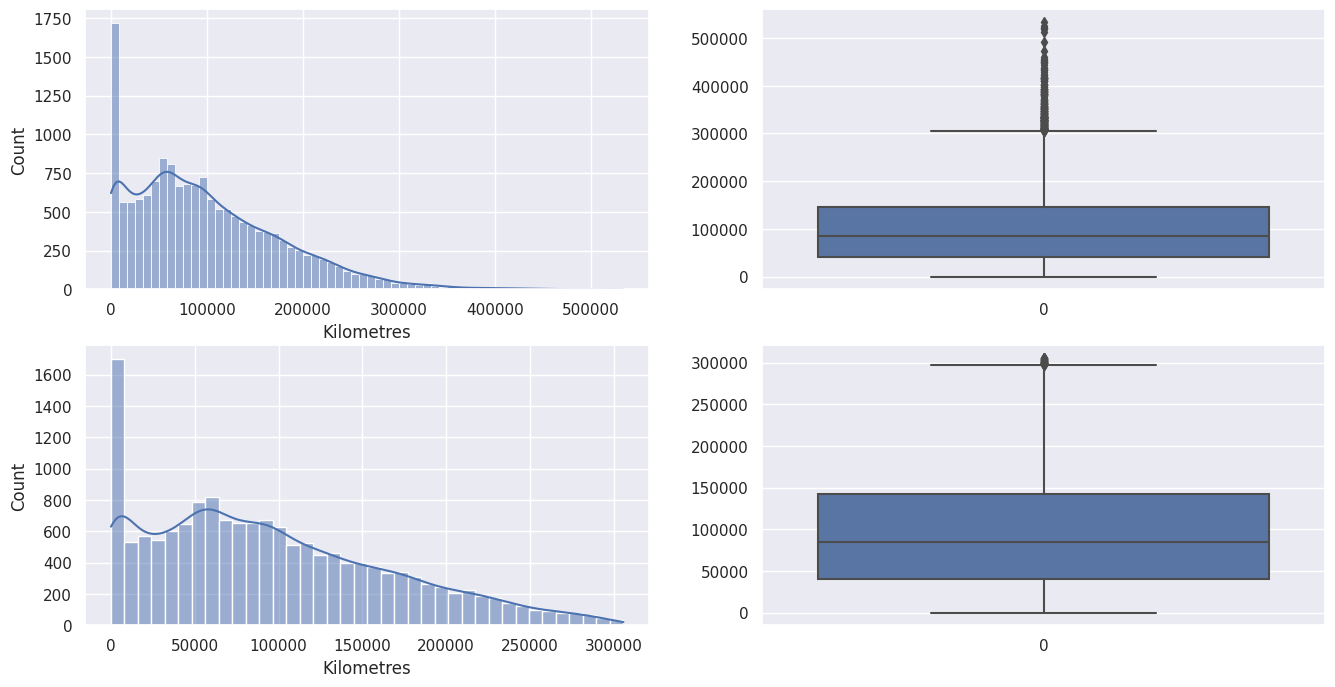

In [81]:
# Comparing before and after outlier removal

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(aus_veh_df['Kilometres'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = aus_veh_df['Kilometres'])

plt.subplot(2,2,3)
sns.histplot(aus_veh_df2['Kilometres'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = aus_veh_df2['Kilometres'])

plt.show()

In [82]:
Q1 = aus_veh_df['Price'].quantile(0.25)
Q3 = aus_veh_df['Price'].quantile(0.75)
IQR = Q3 - Q1

print("25th quartile: ", Q1)
print("75th quartile: ", Q3)
print(IQR)

25th quartile:  18990.0
75th quartile:  42893.0
23903.0


In [83]:
upper = Q3+1.5*IQR
print("Upper Bound:", upper)

lower = Q1-1.5*IQR
print("Lower Bound:", lower)

Upper Bound: 78747.5
Lower Bound: -16864.5


In [84]:
# New dataframe with outliers omitted

aus_veh_df2 = aus_veh_df2[aus_veh_df2['Price'] < upper]

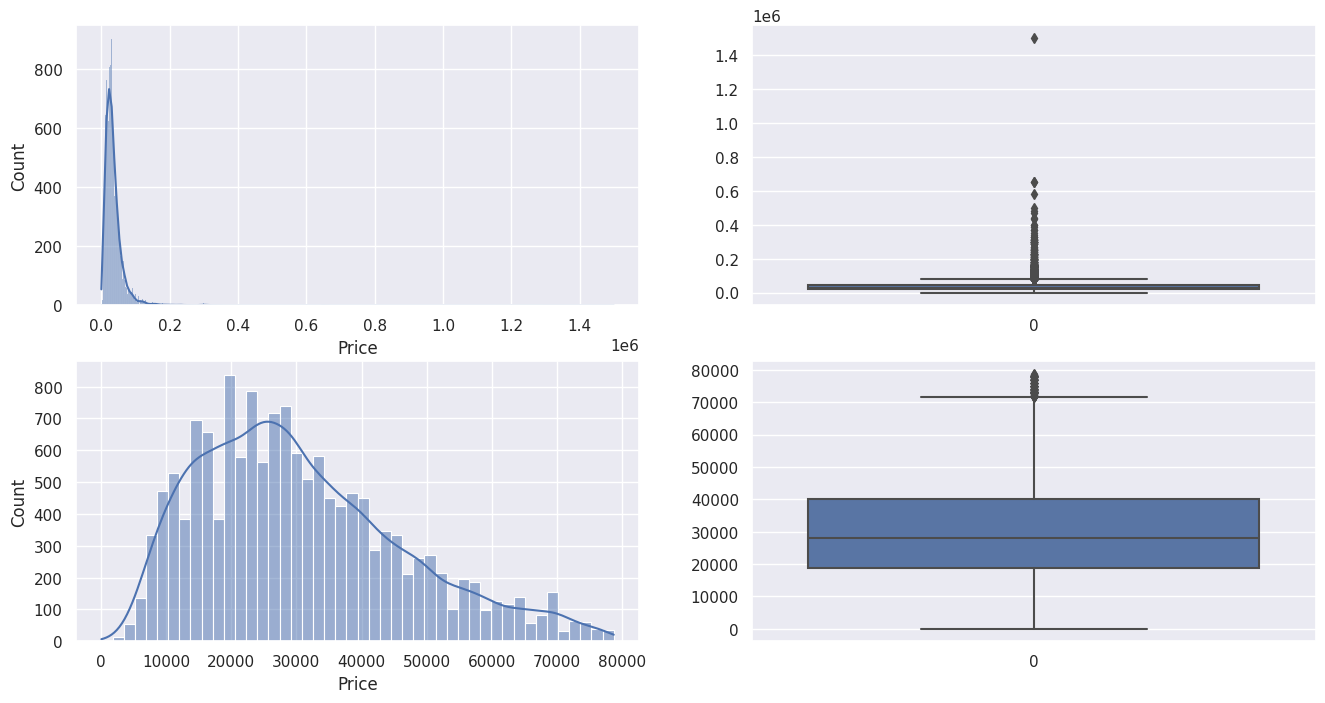

In [85]:
# Comparing before and after outlier removal

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(aus_veh_df['Price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = aus_veh_df['Price'])

plt.subplot(2,2,3)
sns.histplot(aus_veh_df2['Price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = aus_veh_df2['Price'])

plt.show()

In [86]:
aus_veh_df2.shape

(14757, 17)

In [87]:
aus_veh_df.shape

(16001, 17)

In [88]:
aus_veh_df2.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Car_Age
count,14757.000000,13510.000000,14757.000000,13532.000000,14757.000000,14757.000000,14757.000000,14757.000000
mean,2016.028326,7.669726,99400.277292,4.329441,4.047965,5.116263,30642.052179,7.971674
std,4.855461,2.045196,71278.322480,0.943428,0.656003,1.000143,15769.904720,4.855461
min,1981.000000,0.000000,1.000000,0.000000,2.000000,2.000000,88.000000,1.000000
25%,2013.000000,6.500000,44523.000000,4.000000,4.000000,5.000000,18888.000000,4.000000
50%,2017.000000,7.500000,88238.000000,4.000000,4.000000,5.000000,27990.000000,7.000000
75%,2020.000000,8.600000,146735.000000,4.000000,4.000000,5.000000,39990.000000,11.000000
max,2023.000000,27.000000,305720.000000,12.000000,12.000000,14.000000,78690.000000,43.000000


In [89]:
aus_veh_df2.corr()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Car_Age
Year,1.000000,-0.342153,-0.717771,-0.316215,0.101917,0.049715,0.615843,-1.000000
FuelConsumption,-0.342153,1.000000,0.326126,0.599519,-0.262170,0.075746,-0.056211,0.342153
Kilometres,-0.717771,0.326126,1.000000,0.261311,-0.132107,-0.025611,-0.563574,0.717771
CylindersinEngine,-0.316215,0.599519,0.261311,1.000000,-0.212627,0.046627,0.061572,0.316215
Doors,0.101917,-0.262170,-0.132107,-0.212627,1.000000,0.330297,-0.073466,-0.101917
Seats,0.049715,0.075746,-0.025611,0.046627,0.330297,1.000000,0.103489,-0.049715
Price,0.615843,-0.056211,-0.563574,0.061572,-0.073466,0.103489,1.000000,-0.615843
Car_Age,-1.000000,0.342153,0.717771,0.316215,-0.101917,-0.049715,-0.615843,1.000000


In [90]:
aus_veh_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14757 entries, 0 to 16733
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14757 non-null  object 
 1   Year               14757 non-null  int64  
 2   Model              14757 non-null  object 
 3   UsedOrNew          14757 non-null  object 
 4   Transmission       14757 non-null  object 
 5   DriveType          14757 non-null  object 
 6   FuelType           14757 non-null  object 
 7   FuelConsumption    13510 non-null  float64
 8   Kilometres         14757 non-null  float64
 9   CylindersinEngine  13532 non-null  float64
 10  BodyType           14757 non-null  object 
 11  Doors              14757 non-null  float64
 12  Seats              14757 non-null  float64
 13  Price              14757 non-null  float64
 14  City               14757 non-null  object 
 15  State              14757 non-null  object 
 16  Car_Age            147

In [91]:
aus_veh_df2.isnull().sum()*100/aus_veh_df.isnull().count()

Brand                0.000000
Year                 0.000000
Model                0.000000
UsedOrNew            0.000000
Transmission         0.000000
DriveType            0.000000
FuelType             0.000000
FuelConsumption      7.793263
Kilometres           0.000000
CylindersinEngine    7.655772
BodyType             0.000000
Doors                0.000000
Seats                0.000000
Price                0.000000
City                 0.000000
State                0.000000
Car_Age              0.000000
dtype: float64

In [92]:
aus_veh_df2.head()

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,City,State,Car_Age
0,Ssangyong,2022,Rexton,DEMO,Automatic,AWD,Diesel,8.7,5595.0,4.0,SUV,4.000000,7.000000,51990.0,Caringbah,NSW,2
1,MG,2022,MG3,USED,Automatic,Front,Premium,6.7,16.0,4.0,Hatchback,5.000000,5.000000,19990.0,Brookvale,NSW,2
3,Mercedes-Benz,2011,E500,USED,Automatic,Rear,Premium,11.0,136517.0,8.0,Coupe,2.000000,4.000000,32990.0,Mount Druitt,NSW,13
4,Renault,2022,Arkana,USED,Automatic,Front,Unleaded,6.0,1035.0,4.0,SUV,4.000000,5.000000,34990.0,Castle Hill,NSW,2
5,Toyota,2004,Estima,USED,Automatic,Other,Unleaded,NaN,160230.0,NaN,Commercial,4.030041,5.122446,9990.0,Saint Marys,NSW,20


In [93]:
columns_to_dropna = ['FuelConsumption', 'CylindersinEngine']

aus_veh_df2.dropna(subset=columns_to_dropna, inplace=True)

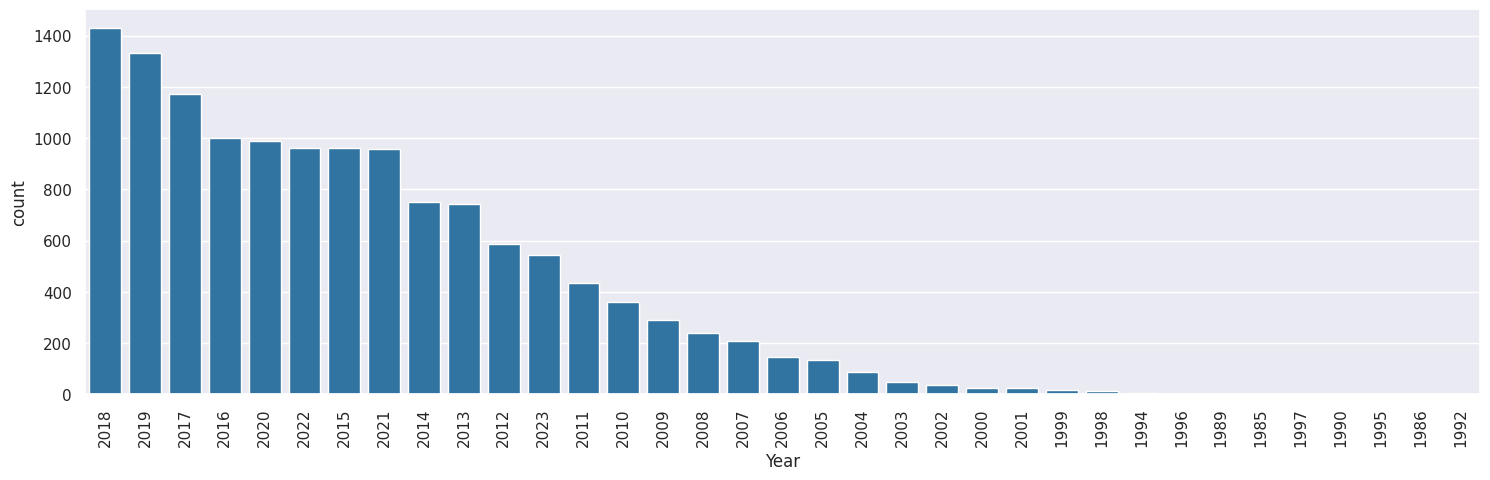

In [95]:
# 2018, 2019, 2017 year cars are most present in the Australian car market.

plt.figure(figsize= (18,5))

sns.countplot(x ='Year', data=aus_veh_df2, color='#1f77b4', order = aus_veh_df2['Year'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

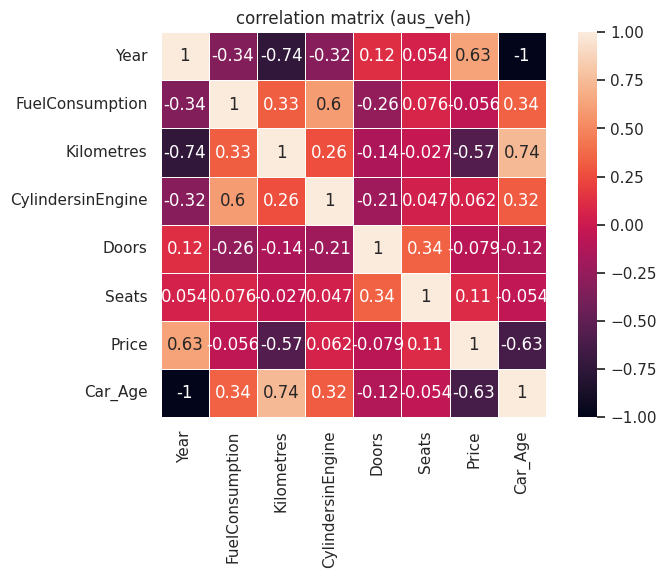

In [96]:
import seaborn as sns

# Make the correlation matrices
corrmat_aus_veh2 = aus_veh_df2.corr()

# Heat maps are a great way to get
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_aus_veh2, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (aus_veh)")

plt.show()

# Try to match the correlation numbers
# to the scatter plots above to get a
# sense of what each magnitude of
# correlation can look like.


In [97]:
aus_veh_df2.FuelConsumption.unique()

array([ 8.7,  6.7, 11. ,  6. ,  5.1,  8. ,  7.1,  4.5,  9.8,  6.2,  5.6,
        5.4,  7.5,  6.1,  5.8,  8.4,  4.7,  7.9,  8.2,  6.9,  6.6,  8.1,
        4.2,  7.7,  9.1,  0. ,  7.4,  7.6,  7.8,  9.9, 10.9,  9.6, 10. ,
        8.8,  6.4,  8.9,  9. ,  6.3, 10.4,  7.2,  5.5, 14.5,  5.9,  9.3,
       11.5,  9.2,  4.8,  7.3, 10.1,  8.3,  6.5,  8.6,  5.2,  4.9,  8.5,
       10.5, 12.2,  7. ,  9.5, 16. ,  9.4,  6.8,  4.6, 11.6,  5.3,  9.7,
       10.6, 11.8, 10.2, 10.3,  3.3,  5.7, 10.8, 10.7, 11.3, 14.6, 13. ,
        4.1,  3.6, 12.1, 17.2, 12.3, 12.7, 13.6, 12.8, 13.2, 15.1,  3.9,
        5. , 11.7, 16.4, 13.7, 12.6, 11.2,  4.4, 11.1, 12.4,  4. , 12. ,
        3.8,  1.9, 11.4, 13.5, 27. , 13.4, 11.9, 14.9,  1.7, 12.5, 17. ,
       12.9, 13.9, 14.4,  4.3, 15. , 14. , 14.2, 13.1, 15.2, 15.7,  3.5,
       14.8, 13.8, 18.6, 16.2, 15.5, 18.1,  2.4, 19.1, 17.1, 17.4, 16.9,
       14.1,  3.7,  2.5,  3.4, 14.7, 17.8])

In [98]:
aus_veh_df2.CylindersinEngine.unique()

array([ 4.,  8.,  3.,  6.,  5.,  0.,  2., 12., 10.])

In [99]:
aus_veh_df2.BodyType.unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Sedan', 'Ute / Tray',
       'People Mover', 'Convertible', 'Wagon', 'Other'], dtype=object)

In [100]:
aus_veh_df2.Doors.unique()

array([4., 5., 2., 3.])

In [101]:
aus_veh_df2.Seats.unique()

array([ 7.,  5.,  4.,  2.,  3., 14.,  8.,  6.,  9., 11., 12.])

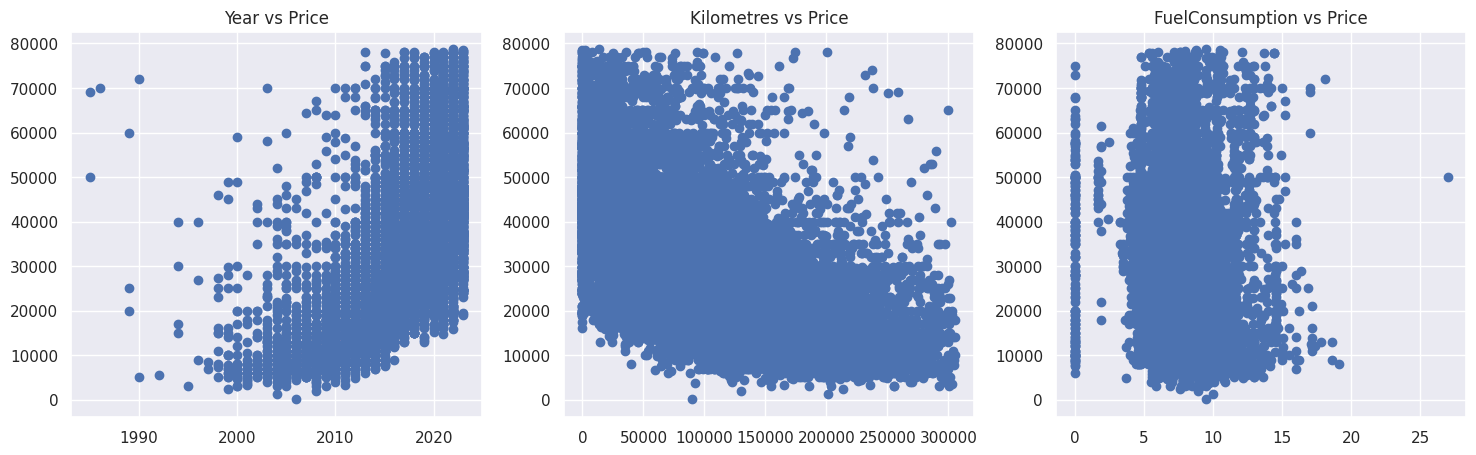

In [102]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(aus_veh_df2["Year"], aus_veh_df2["Price"])
plt.title("Year vs Price")

plt.subplot(1,3,2)
plt.scatter(aus_veh_df2["Kilometres"], aus_veh_df2["Price"])
plt.title("Kilometres vs Price")

plt.subplot(1,3,3)
plt.scatter(aus_veh_df2["FuelConsumption"], aus_veh_df2["Price"])
plt.title("FuelConsumption vs Price")

plt.show()

In [103]:
# Descriptive statistics for all variables
aus_veh_df2.describe(include= 'all')

,Brand,Year,Model,UsedOrNew,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price,City,State,Car_Age
count,13510,13510.000000,13510,13510,13510,13510,13510,13510.000000,13510.000000,13510.000000,13510,13510.000000,13510.000000,13510.000000,13510,13510,13510.000000
unique,56,NaN,550,3,3,5,8,NaN,NaN,NaN,10,NaN,NaN,NaN,572,8,NaN
top,Toyota,NaN,Hilux,USED,Automatic,Front,Unleaded,NaN,NaN,NaN,SUV,NaN,NaN,NaN,Minchinbury,NSW,NaN
freq,2007,NaN,369,12683,11966,6434,6078,NaN,NaN,NaN,6100,NaN,NaN,NaN,485,5232,NaN
mean,NaN,2016.170540,NaN,NaN,NaN,NaN,NaN,7.669726,99041.721984,4.329090,NaN,4.042709,5.115692,30651.555366,NaN,NaN,7.829460
std,NaN,4.715059,NaN,NaN,NaN,NaN,NaN,2.045196,71180.893716,0.942529,NaN,0.659766,1.045284,15778.344104,NaN,NaN,4.715059
min,NaN,1985.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,2.000000,2.000000,88.000000,NaN,NaN,1.000000
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,6.500000,44326.000000,4.000000,NaN,4.000000,5.000000,18888.000000,NaN,NaN,4.000000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,7.500000,86906.500000,4.000000,NaN,4.000000,5.000000,27990.000000,NaN,NaN,7.000000
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,8.600000,146299.000000,4.000000,NaN,4.000000,5.000000,39990.000000,NaN,NaN,11.000000


In [104]:
aus_veh_df2.corr()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,Price,Car_Age
Year,1.000000,-0.342153,-0.741328,-0.317518,0.117351,0.053701,0.629230,-1.000000
FuelConsumption,-0.342153,1.000000,0.326126,0.599519,-0.262170,0.075746,-0.056211,0.342153
Kilometres,-0.741328,0.326126,1.000000,0.261671,-0.144697,-0.026836,-0.567016,0.741328
CylindersinEngine,-0.317518,0.599519,0.261671,1.000000,-0.211639,0.046707,0.061715,0.317518
Doors,0.117351,-0.262170,-0.144697,-0.211639,1.000000,0.343185,-0.078611,-0.117351
Seats,0.053701,0.075746,-0.026836,0.046707,0.343185,1.000000,0.108106,-0.053701
Price,0.629230,-0.056211,-0.567016,0.061715,-0.078611,0.108106,1.000000,-0.629230
Car_Age,-1.000000,0.342153,0.741328,0.317518,-0.117351,-0.053701,-0.629230,1.000000


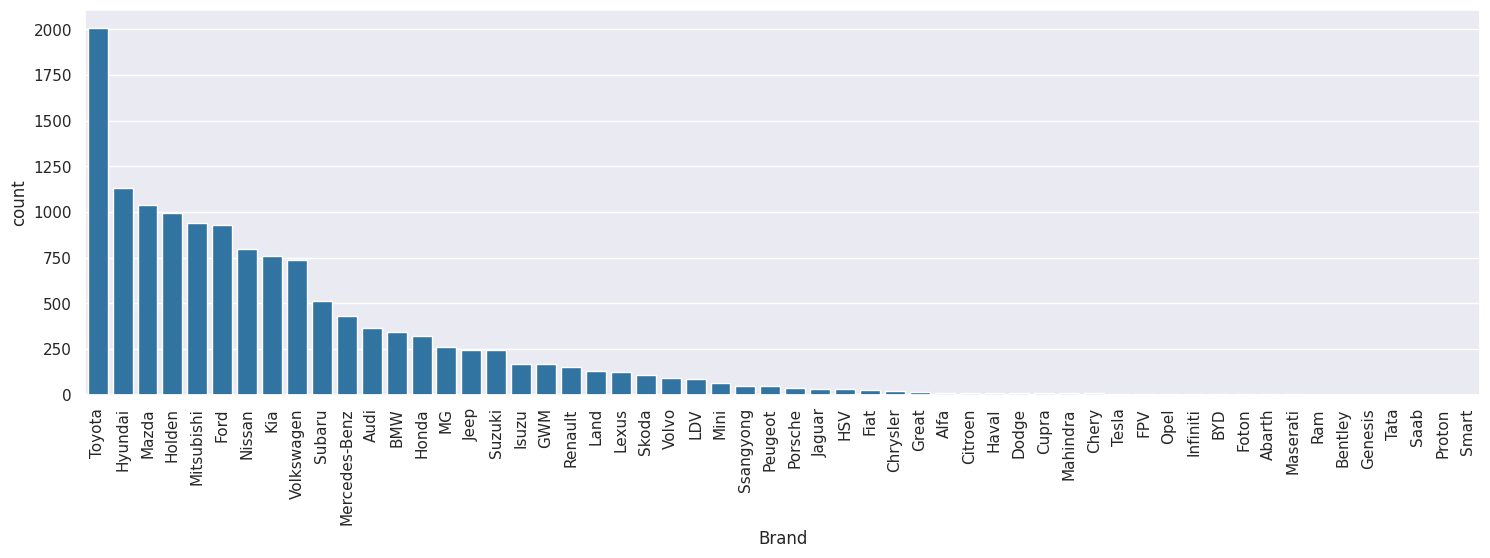

In [105]:
plt.figure(figsize= (18,5))

sns.countplot(x='Brand', data=aus_veh_df2, color='#1f77b4', order = aus_veh_df2['Brand'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

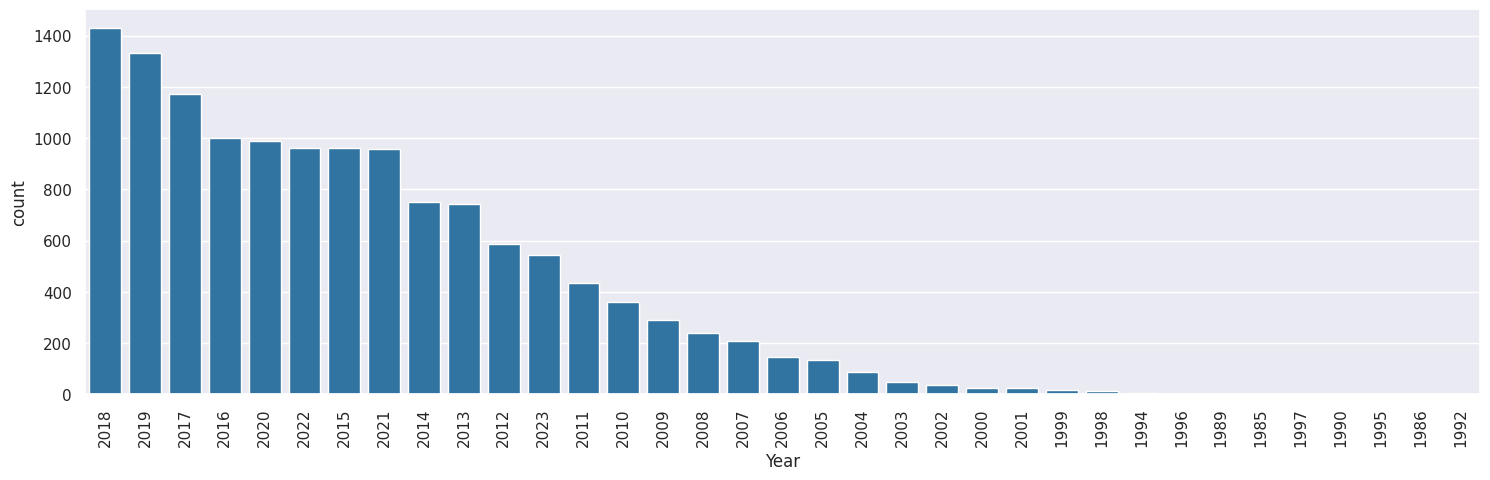

In [106]:

plt.figure(figsize= (18,5))

sns.countplot(x ='Year', data=aus_veh_df2, color='#1f77b4', order = aus_veh_df2['Year'].value_counts().index)

plt.xticks(rotation = 90)
plt.show()

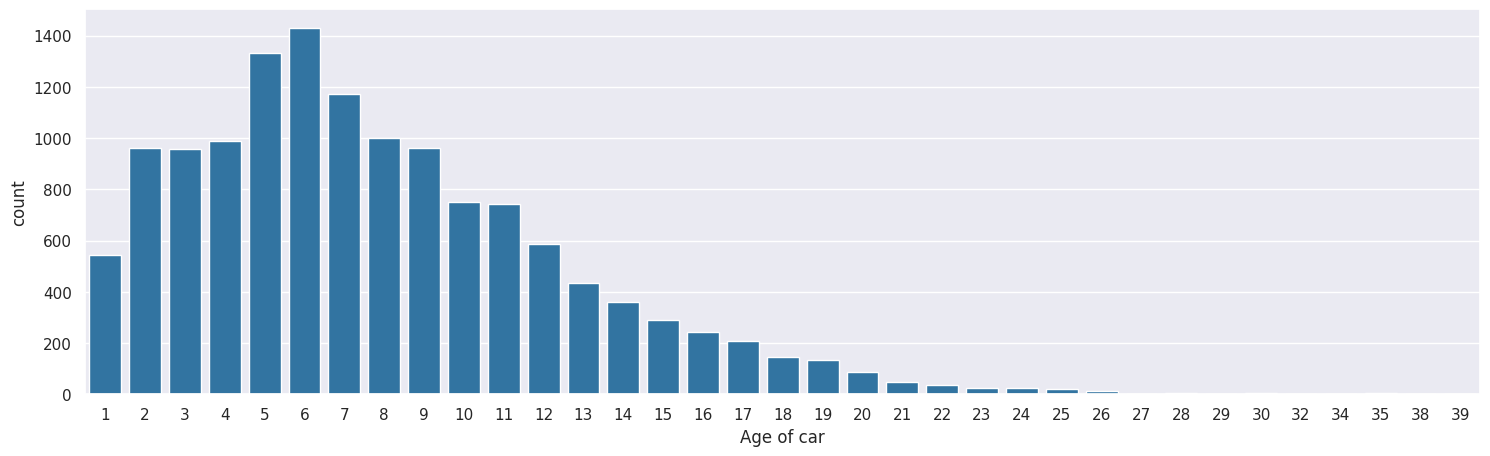

In [107]:
plt.figure(figsize= (18,5))

sns.countplot(x ='Car_Age', data=aus_veh_df2, color='#1f77b4')

plt.xlabel('Age of car')
plt.show()

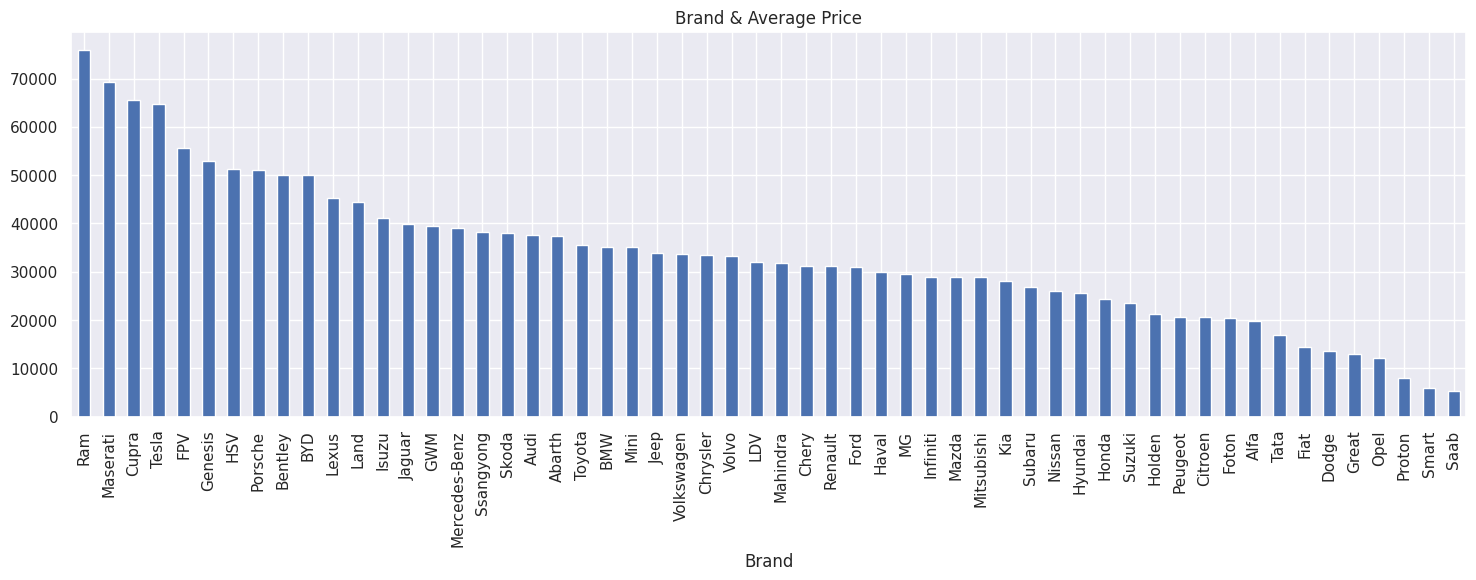

In [108]:
plt.figure(figsize= (18,5))

aus_veh_df2.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation = 90)
plt.xlabel('Brand')
plt.title('Brand & Average Price')
plt.show()

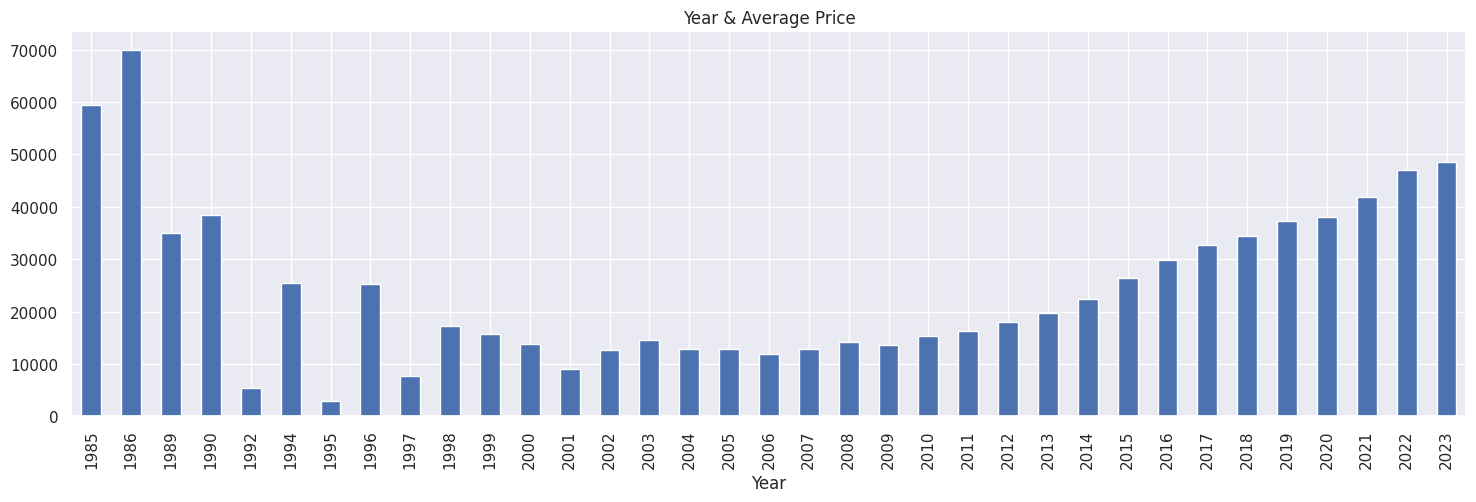

In [110]:
plt.figure(figsize= (18,5))

aus_veh_df2.groupby('Year')['Price'].mean().plot.bar()
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.title('Year & Average Price')
plt.show()

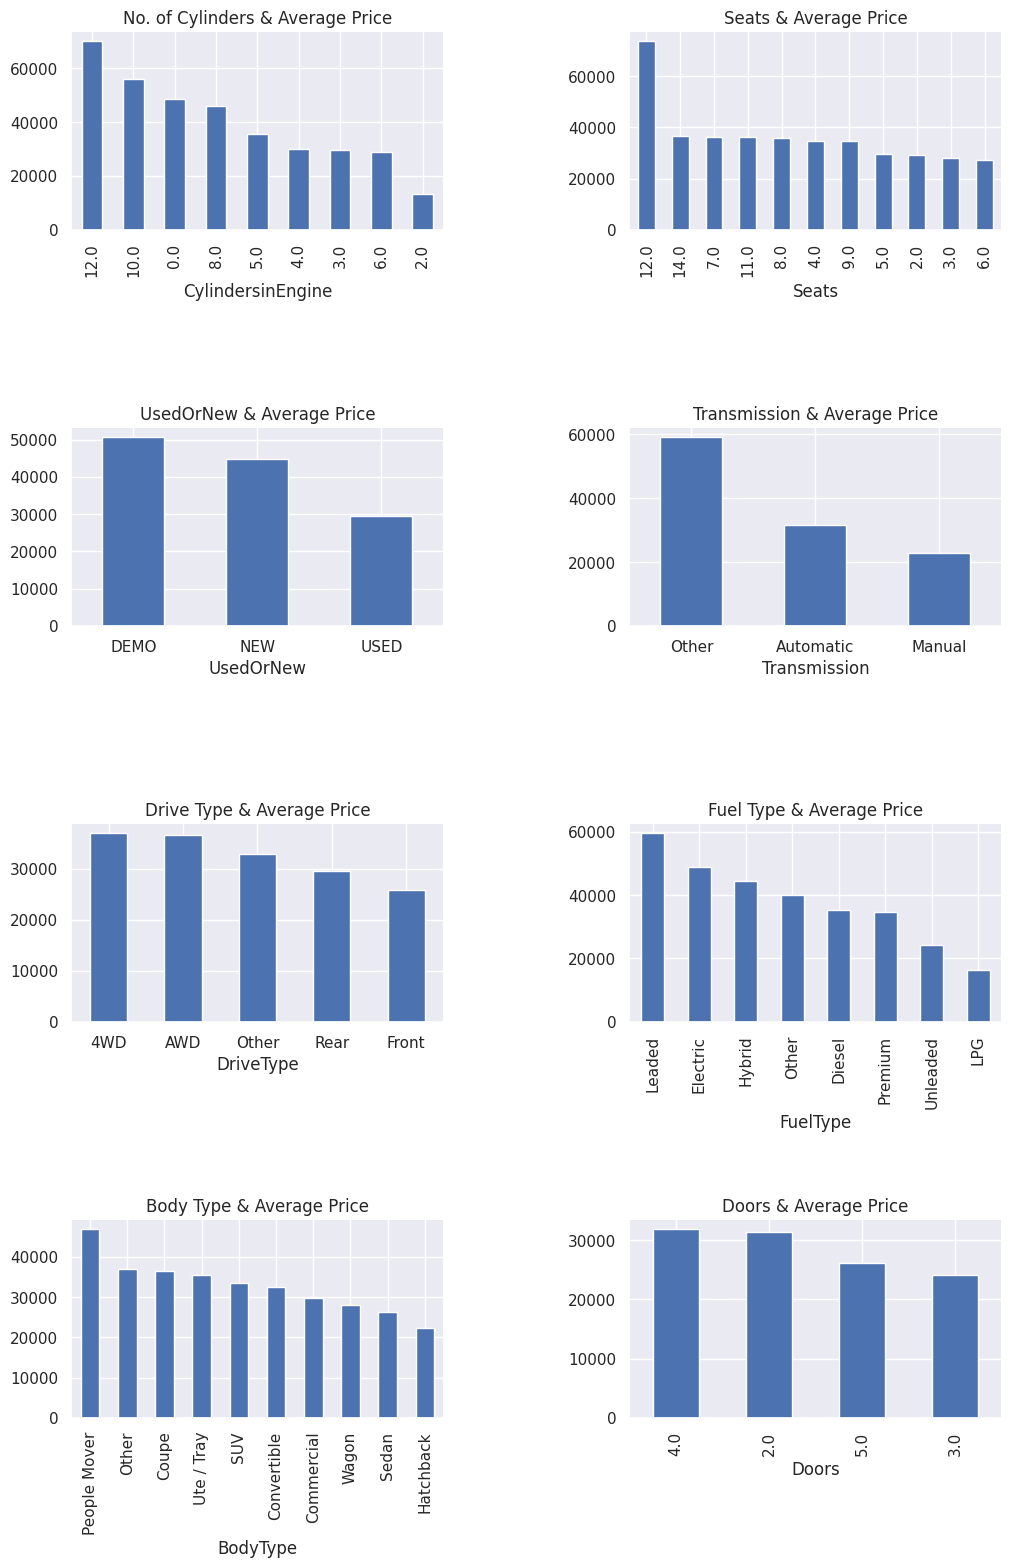

In [111]:

fig, axe = plt.subplots(4,2, figsize=(12,18))

aus_veh_df2.groupby('CylindersinEngine')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[0][0])
axe[0][0].tick_params(axis='x', labelrotation=90)
axe[0][0].set_title('No. of Cylinders & Average Price')

aus_veh_df2.groupby('Seats')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[0][1])
axe[0][1].tick_params(axis='x', labelrotation=90)
axe[0][1].set_title('Seats & Average Price')

aus_veh_df2.groupby('UsedOrNew')['Price'].mean().plot.bar(ax=axe[1][0])
axe[1][0].tick_params(axis='x', labelrotation=0)
axe[1][0].set_title('UsedOrNew & Average Price')

aus_veh_df2.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[1][1])
axe[1][1].tick_params(axis='x', labelrotation=0)
axe[1][1].set_title('Transmission & Average Price')

aus_veh_df2.groupby('DriveType')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[2][0])
axe[2][0].tick_params(axis='x', labelrotation=0)
axe[2][0].set_title('Drive Type & Average Price')

aus_veh_df2.groupby('FuelType')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[2][1])
axe[2][1].tick_params(axis='x', labelrotation=90)
axe[2][1].set_title('Fuel Type & Average Price')

aus_veh_df2.groupby('BodyType')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[3][0])
axe[3][0].tick_params(axis='x', labelrotation=90)
axe[3][0].set_title('Body Type & Average Price')

aus_veh_df2.groupby('Doors')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axe[3][1])
axe[3][1].tick_params(axis='x', labelrotation=90)
axe[3][1].set_title('Doors & Average Price')

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

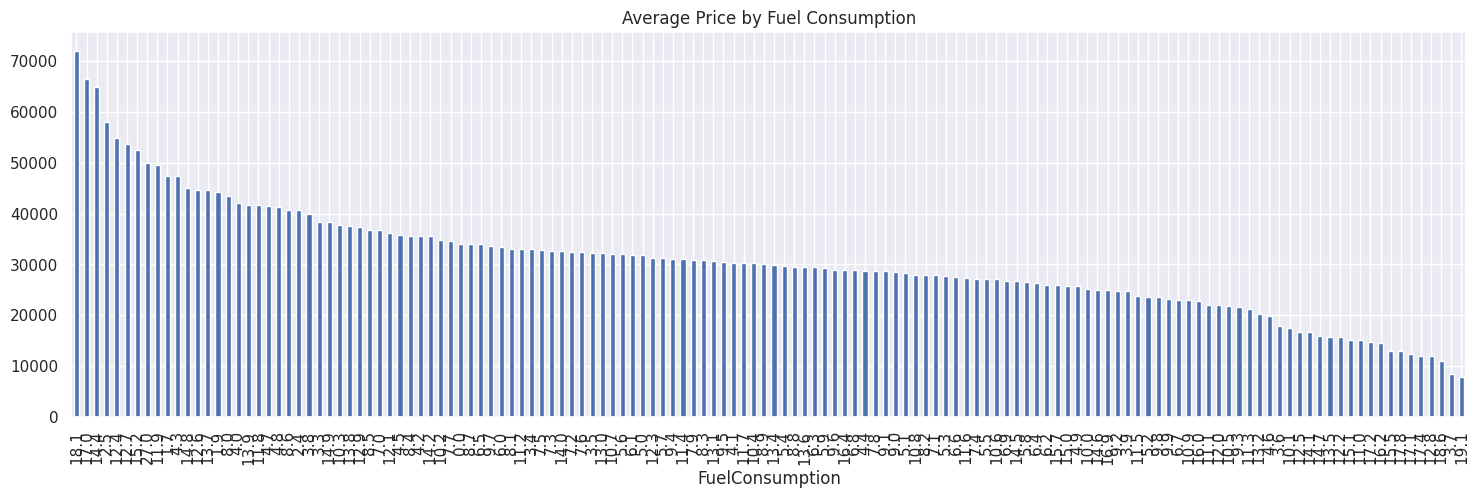

In [272]:
plt.figure(figsize= (18,5))

aus_veh_df2.groupby('FuelConsumption')['Price'].mean().sort_values(ascending=False).plot.bar()

plt.title('Average Price by Fuel Consumption')

plt.show()

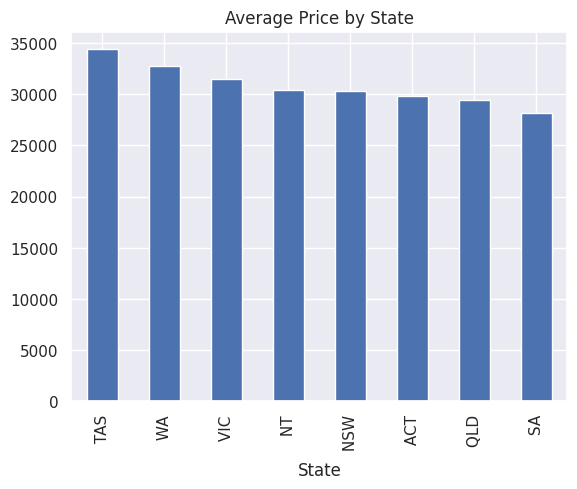

In [273]:
aus_veh_df2.groupby('State')['Price'].mean().sort_values(ascending=False).plot.bar()

plt.title('Average Price by State')
plt.show()

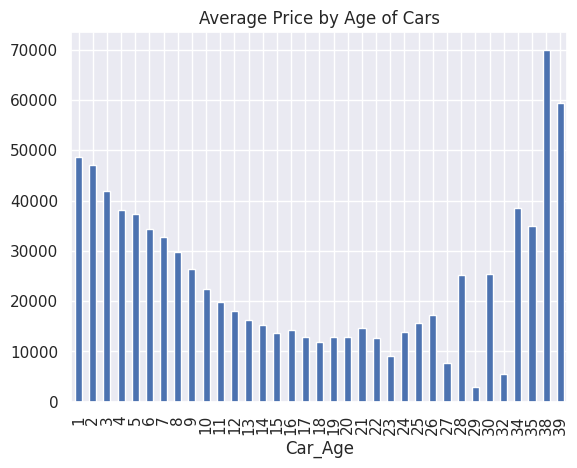

In [275]:

aus_veh_df2.groupby('Car_Age')['Price'].mean().plot.bar()

plt.title('Average Price by Age of Cars')
plt.xticks(rotation = 90)
plt.show()

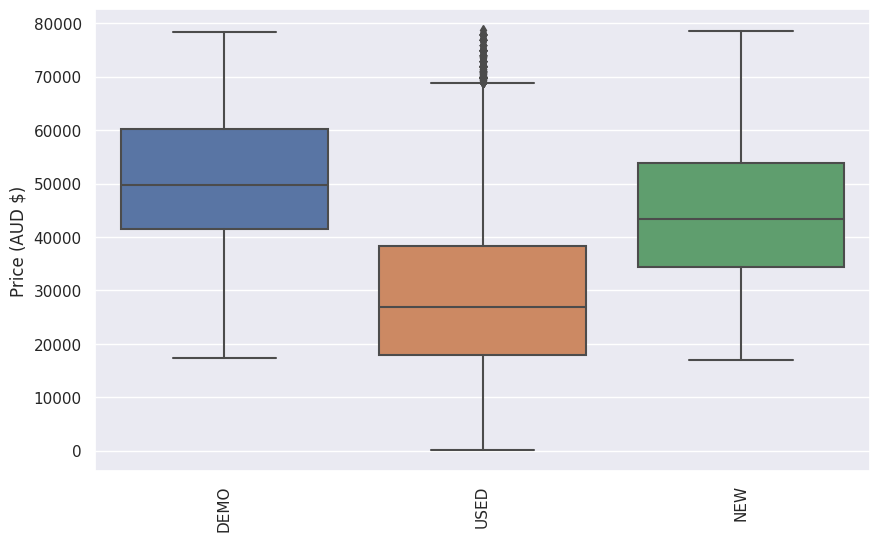

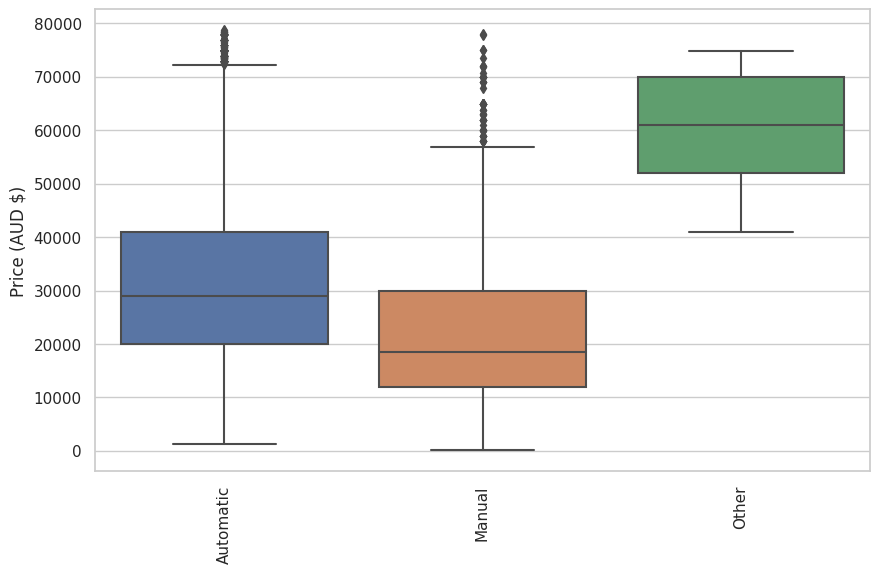

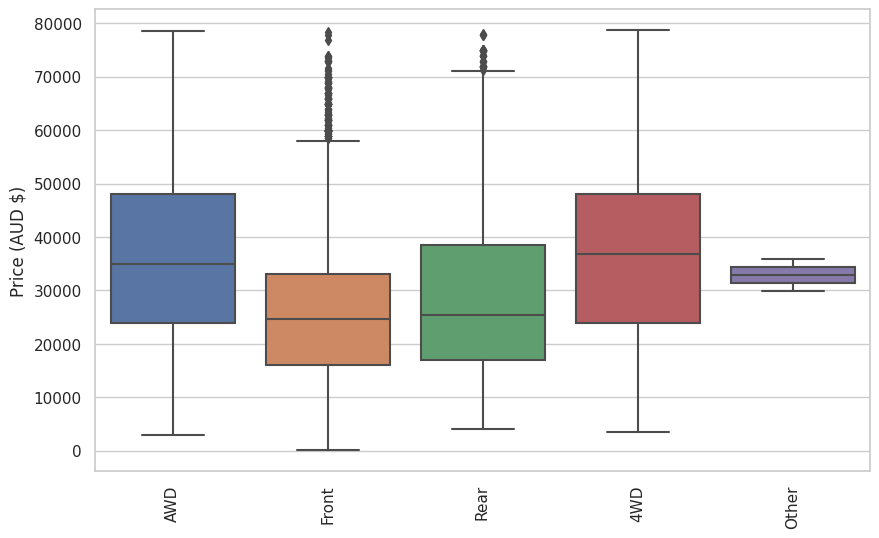

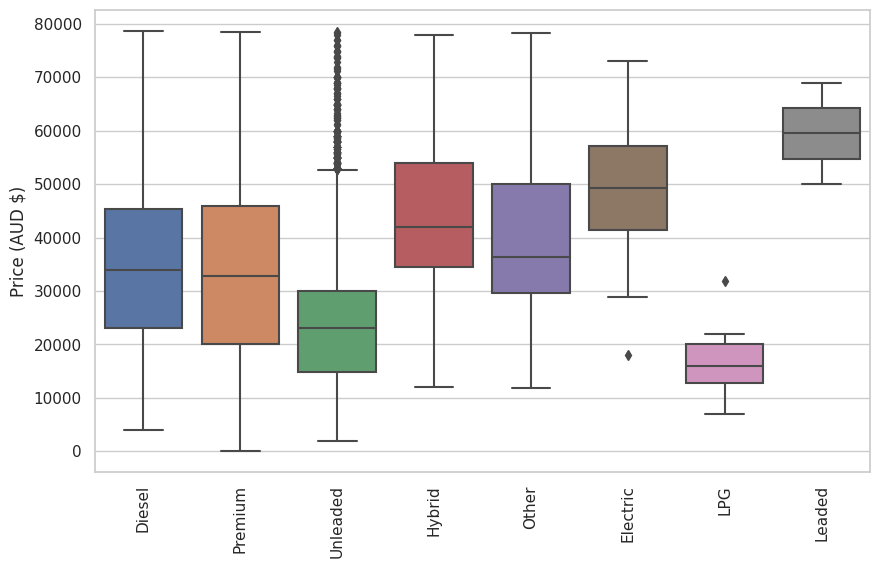

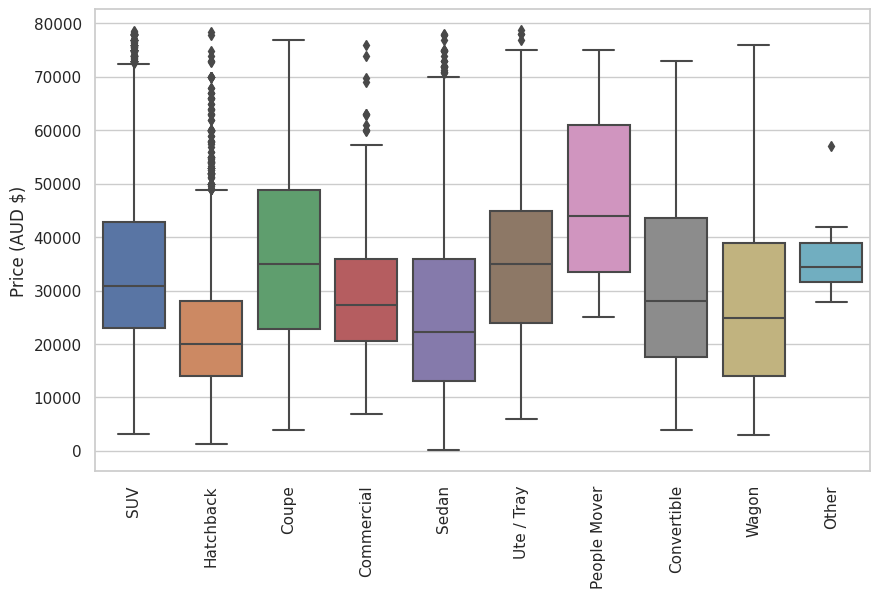

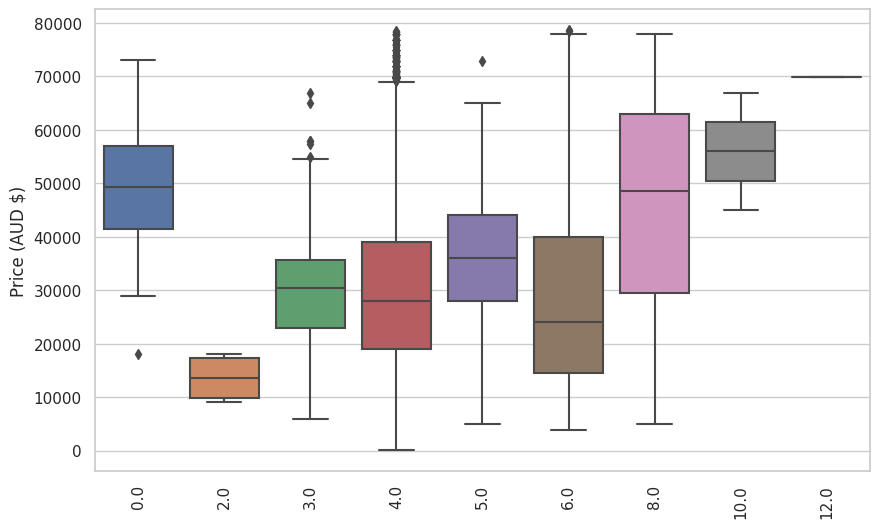

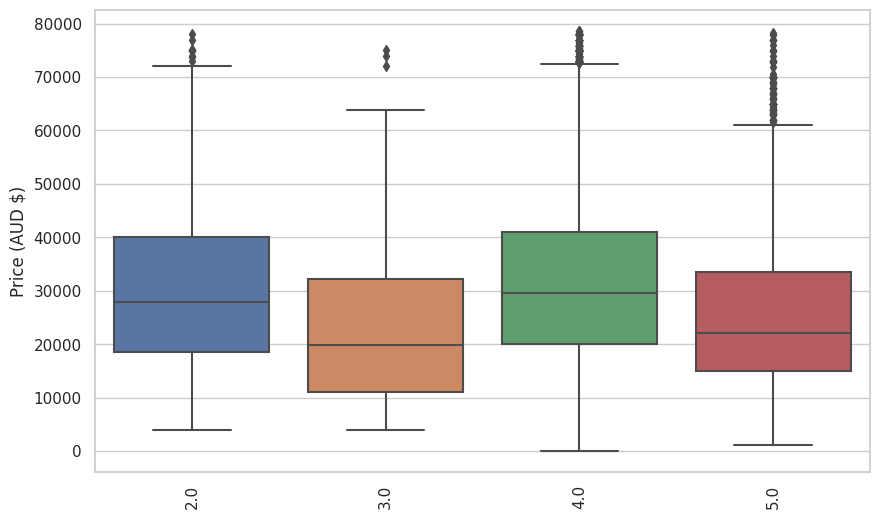

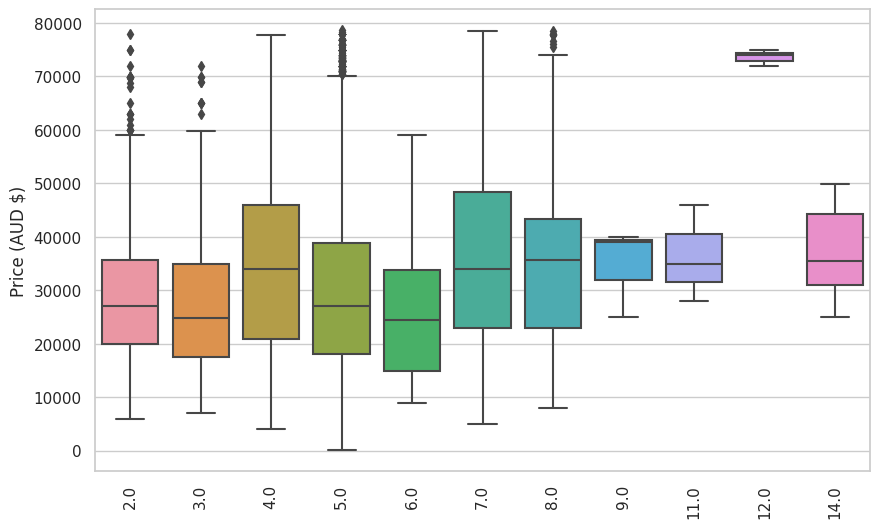

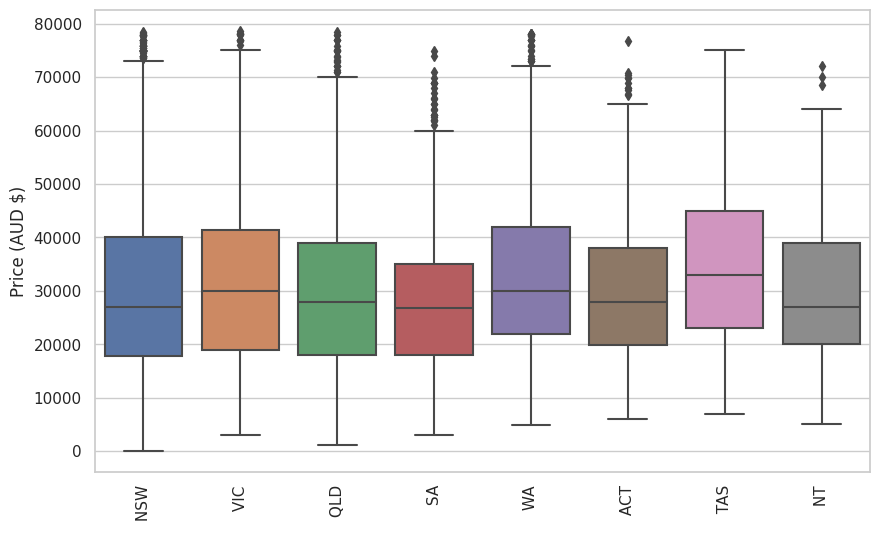

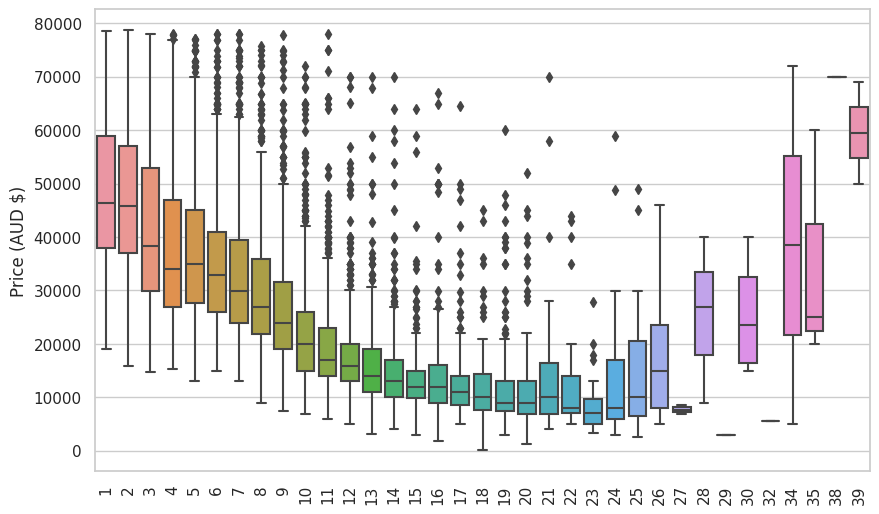

In [276]:
cols = ['UsedOrNew','Transmission','DriveType','FuelType','BodyType','CylindersinEngine','Doors','Seats','State','Car_Age']

for col in cols:
    plt.subplots(figsize=(10,6))
    sns.boxplot(x=aus_veh_df2[col], y=aus_veh_df2['Price'])
    plt.ylabel('Price (AUD $)')
    plt.xlabel('')
    plt.xticks(rotation=90)
    sns.set(style='whitegrid')
    plt.show()

In [277]:
aus_veh_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13512 entries, 0 to 16733
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              13512 non-null  object 
 1   Year               13512 non-null  int64  
 2   Model              13512 non-null  object 
 3   UsedOrNew          13512 non-null  object 
 4   Transmission       13512 non-null  object 
 5   DriveType          13512 non-null  object 
 6   FuelType           13512 non-null  object 
 7   FuelConsumption    13512 non-null  float64
 8   Kilometres         13512 non-null  float64
 9   CylindersinEngine  13512 non-null  float64
 10  BodyType           13512 non-null  object 
 11  Doors              13512 non-null  float64
 12  Seats              13512 non-null  float64
 13  Price              13512 non-null  int64  
 14  City               13512 non-null  object 
 15  State              13512 non-null  object 
 16  Car_Age            135

In [289]:
aus_veh_df3 =aus_veh_df2

In [290]:
aus_veh_df3 = aus_veh_df3.drop(['Brand','Year','Model', 'City'], axis=1)

In [291]:
aus_veh_df3.nunique()

UsedOrNew                3
Transmission             3
DriveType                5
FuelType                 8
FuelConsumption        138
Kilometres           12195
CylindersinEngine        9
BodyType                10
Doors                    4
Seats                   11
Price                 2740
State                    8
Car_Age                 35
dtype: int64

In [292]:
aus_veh_df3 = pd.get_dummies(aus_veh_df3)

In [293]:
aus_veh_df3.shape

(13512, 44)

In [294]:
y = aus_veh_df3['Price']
X = aus_veh_df3.drop(['Price'], axis =1)

y.shape, X.shape

((13512,), (13512, 43))

Training the model using Linear Regression

In [295]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [297]:
y_lr_train_pred = lr.predict(X_train)

y_lr_test_pred = lr.predict(X_test)

In [298]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [299]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,73934904.496658,0.701508,76773021.103683,0.697416


Training the model using Radom Forest

In [300]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [301]:
y_rf_train_pred = rf.predict(X_train)

y_rf_test_pred = rf.predict(X_test)

In [302]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [303]:
rf_results = pd.DataFrame(['Random Forest Regression', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regression,5208934.824744,0.97897,38300951.883299,0.849045


In [304]:
df_models = pd.concat([lr_results, rf_results], axis =0)

df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,73934904.496658,0.701508,76773021.103683,0.697416
0,Random Forest Regression,5208934.824744,0.97897,38300951.883299,0.849045


In [305]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,73934904.496658,0.701508,76773021.103683,0.697416
1,Random Forest Regression,5208934.824744,0.97897,38300951.883299,0.849045


**Conclusion**
In summary, the results show that the Random Forest Regression model outperforms the Linear Regression model on the given dataset. It has a lower MSE, and a higher R². Therefore, in this specific case, Random Forest Regression is a more suitable model for predicting car price based on these features.

Data Visualization - Prediction results Linear Regression and Random Forest

Text(0.5, 0, 'Experimental Price')

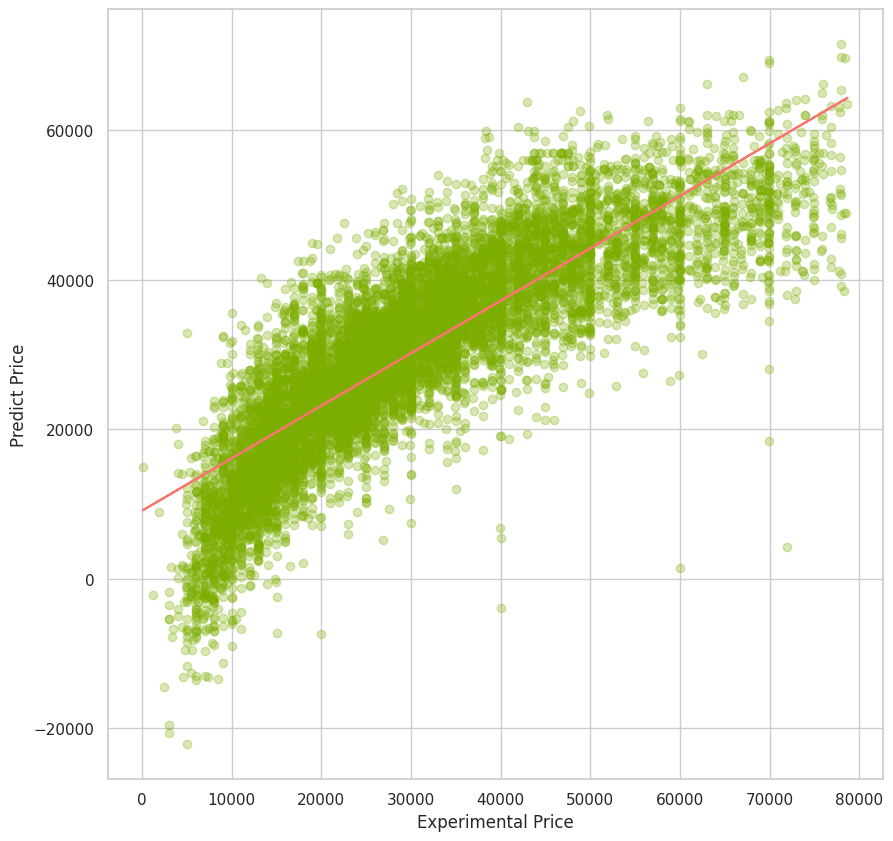

In [306]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_train, y=y_lr_train_pred, c='#7CAE00', alpha=0.3)

z= np.polyfit(y_train, y_lr_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Price')
plt.xlabel('Experimental Price')

Text(0.5, 0, 'Experimental Price')

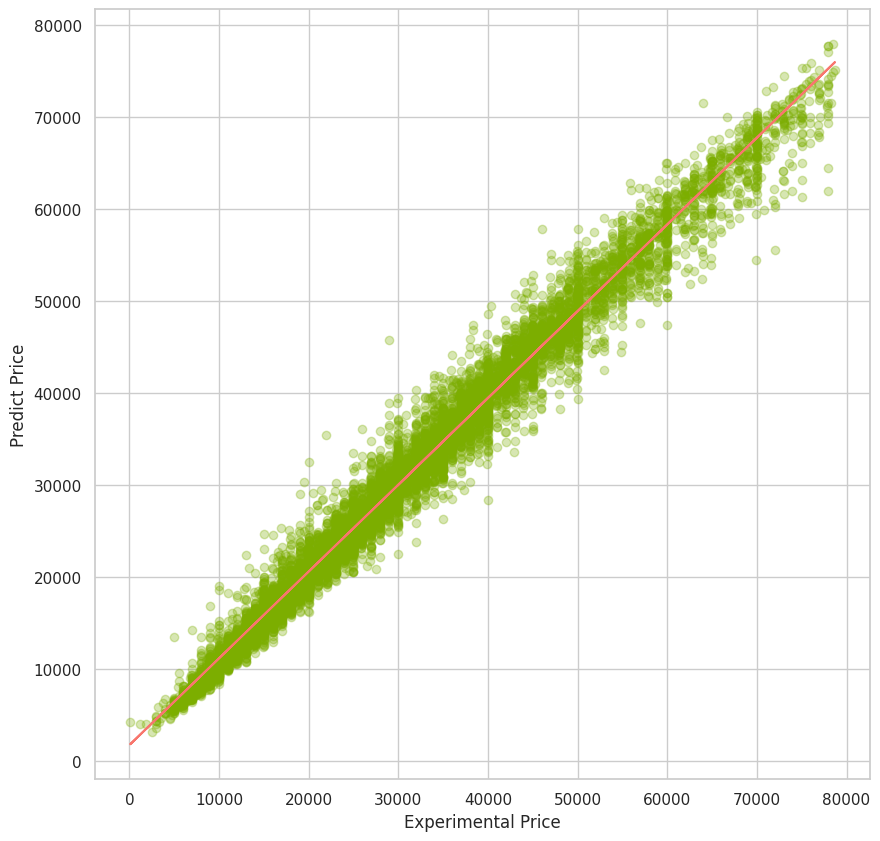

In [307]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_train, y=y_rf_train_pred, c='#7CAE00', alpha=0.3)

z= np.polyfit(y_train, y_rf_train_pred, 1)
p= np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict Price')
plt.xlabel('Experimental Price')